## Impact of Blur

3 other dimensions:

->Font Size: 18

->Background Color: White

->word count: all 3

3 blur levels: 0, 0.75, 1.5

word count: 40-60, 110-130, 180-200

for each word count:

->3 blur levels


In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from math import pi
from nltk.translate.bleu_score import sentence_bleu
import warnings
warnings.filterwarnings("ignore")



## Blur Level Dataset Functions

In [19]:
# Function to filter data for blur level analysis
def filter_blur_level_data(df, base_font_size, base_background_color, blur_levels, word_count_order):
    filtered_df = df[
        (df['Font Size'] == base_font_size) &
        (df['Background Color'] == base_background_color) &
        (df['Blur Level'].isin(blur_levels)) &
        (df['Word Count Range'].isin(word_count_order))
    ]
    return filtered_df

# Function to analyze blur level impact on WER
def analyze_blur_level_impact(df, word_count_order, language_name):
    for word_count in word_count_order:
        # Filter data for the current word count
        wc_df = df[df['Word Count Range'] == word_count]

        # Calculate average WER for each blur level
        avg_wer = wc_df.groupby('Blur Level')['WER'].mean().reset_index()

        # Plotting
        plt.figure(figsize=(14, 8))  # Larger figure size for better presentation

        # Create a bar plot
        sns.barplot(
            x=avg_wer['Blur Level'],
            y=avg_wer['WER'],
            palette='Set2',  # Use a vibrant palette for blur levels
            edgecolor='black'
        )

        # Add labels, title, and grid
        plt.title(
            f'Impact of Blur Level on WER for Word Count {word_count} ({language_name})',
            fontsize=22,
            fontweight='bold',
            pad=20
        )
        plt.xlabel('Blur Level', fontsize=18, fontweight='bold')
        plt.ylabel('Average WER', fontsize=18, fontweight='bold')
        plt.xticks(fontsize=14, fontweight='bold')
        plt.yticks(fontsize=14, fontweight='bold')

        # Add gridlines for better readability
        plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)

        # Ensure tight layout
        plt.tight_layout()
        plt.show()


## URDU Evaluation

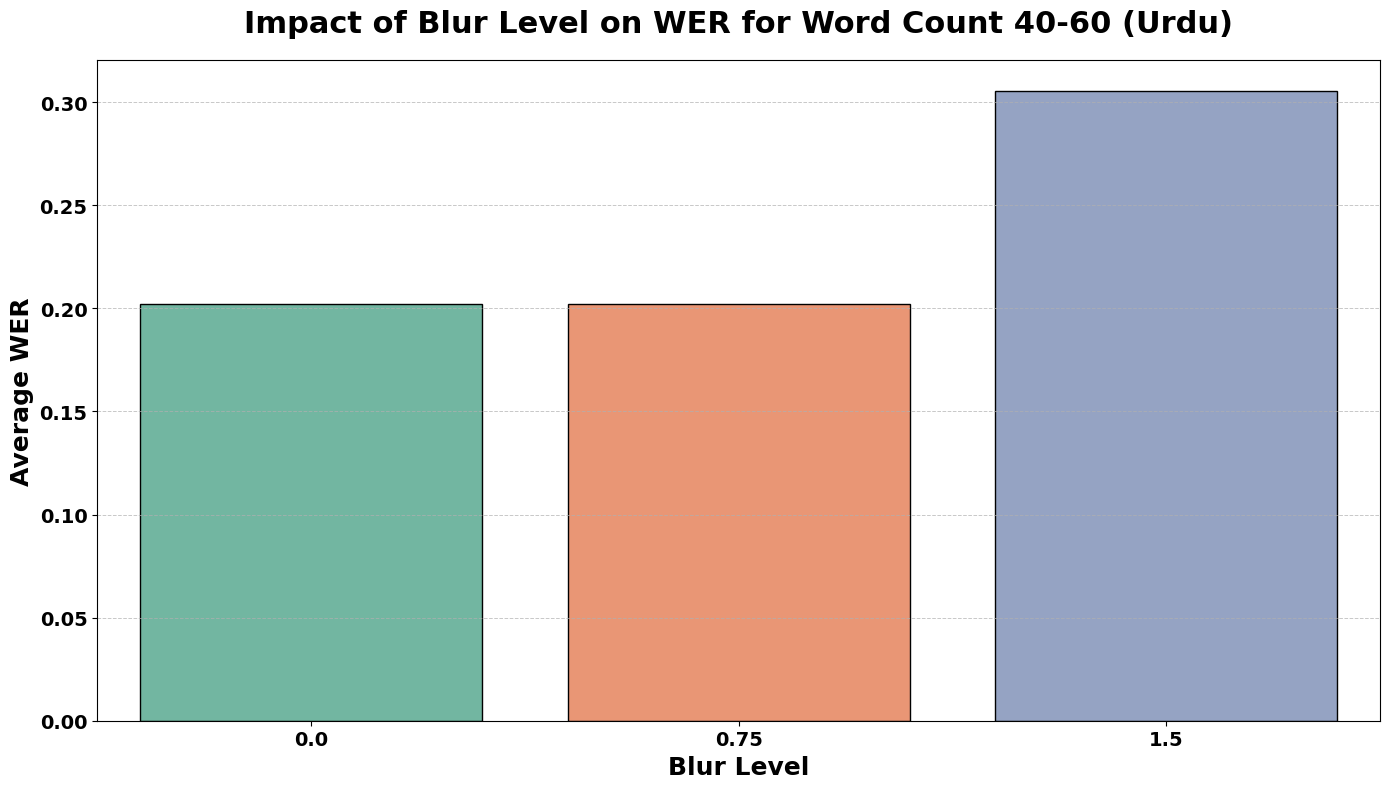

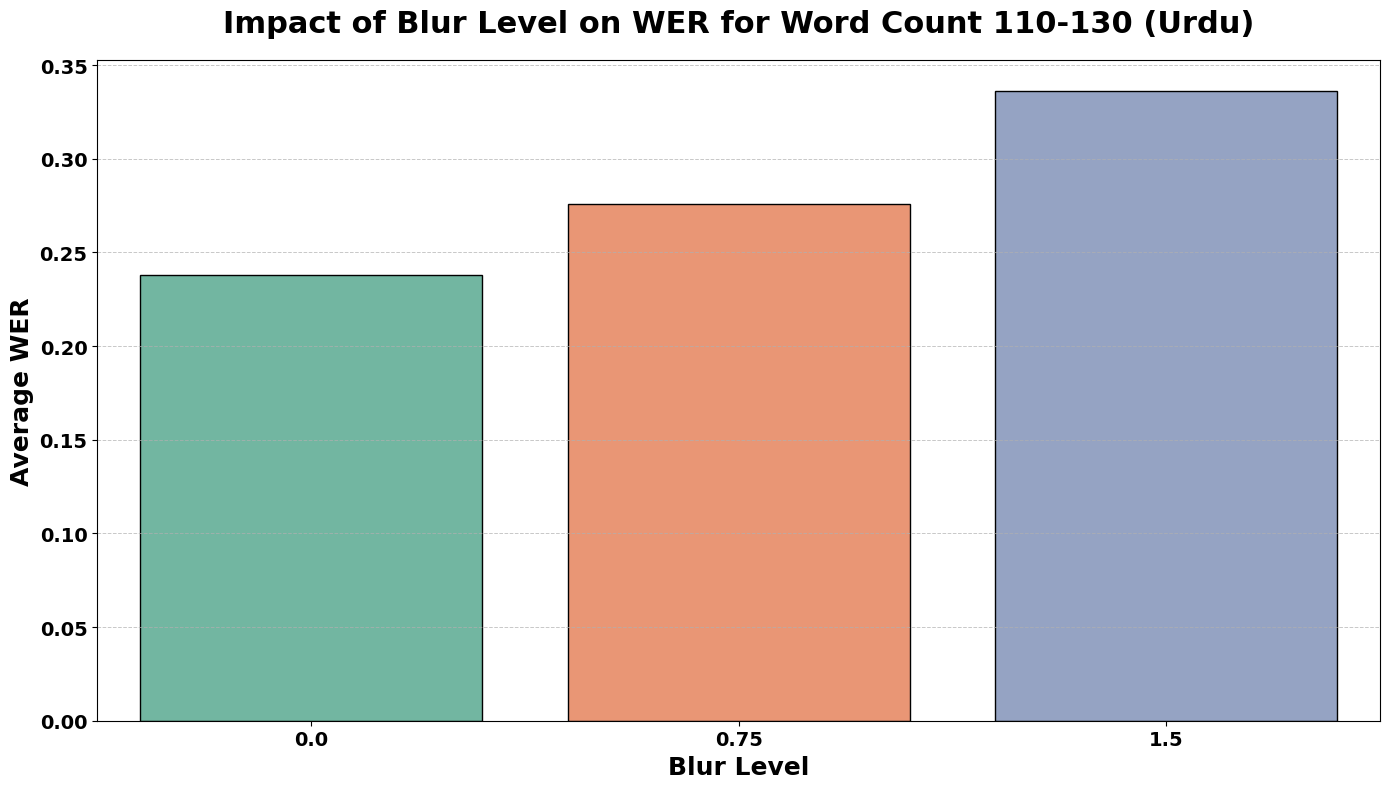

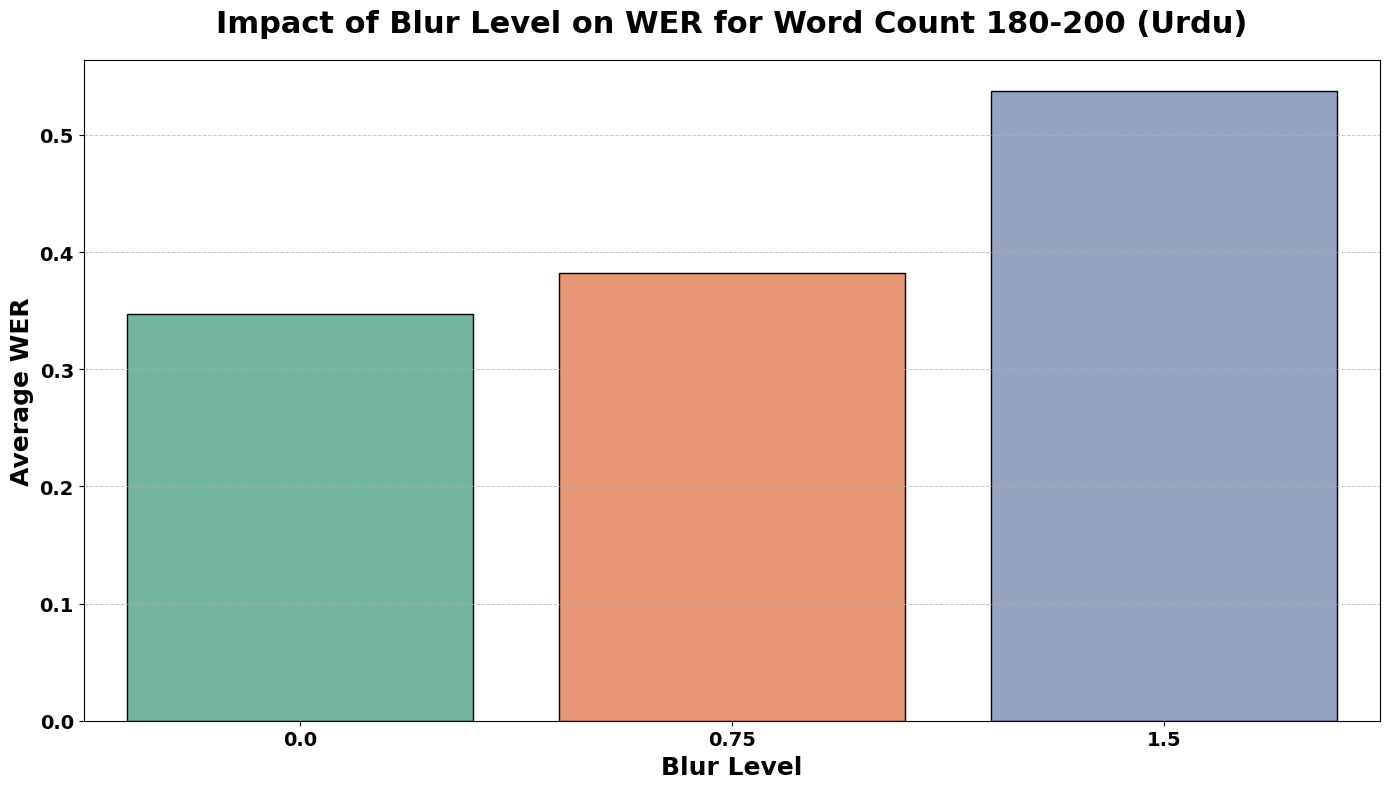

In [20]:
# File path
urdu_file_path = 'urdu_inferenced_dataset_with_metrics.csv'
urdu_df = pd.read_csv(urdu_file_path)

# Define filtering conditions
base_font_size = 18
base_background_color = 'white'
blur_levels = [0, 0.75, 1.5]
word_count_order = ['40-60', '110-130', '180-200']

# Filter the data
filtered_urdu_df = filter_blur_level_data(urdu_df, base_font_size, base_background_color, blur_levels, word_count_order)

# Analyze blur level impact on WER
analyze_blur_level_impact(filtered_urdu_df, word_count_order, "Urdu")


## ENGLISH Evaluation

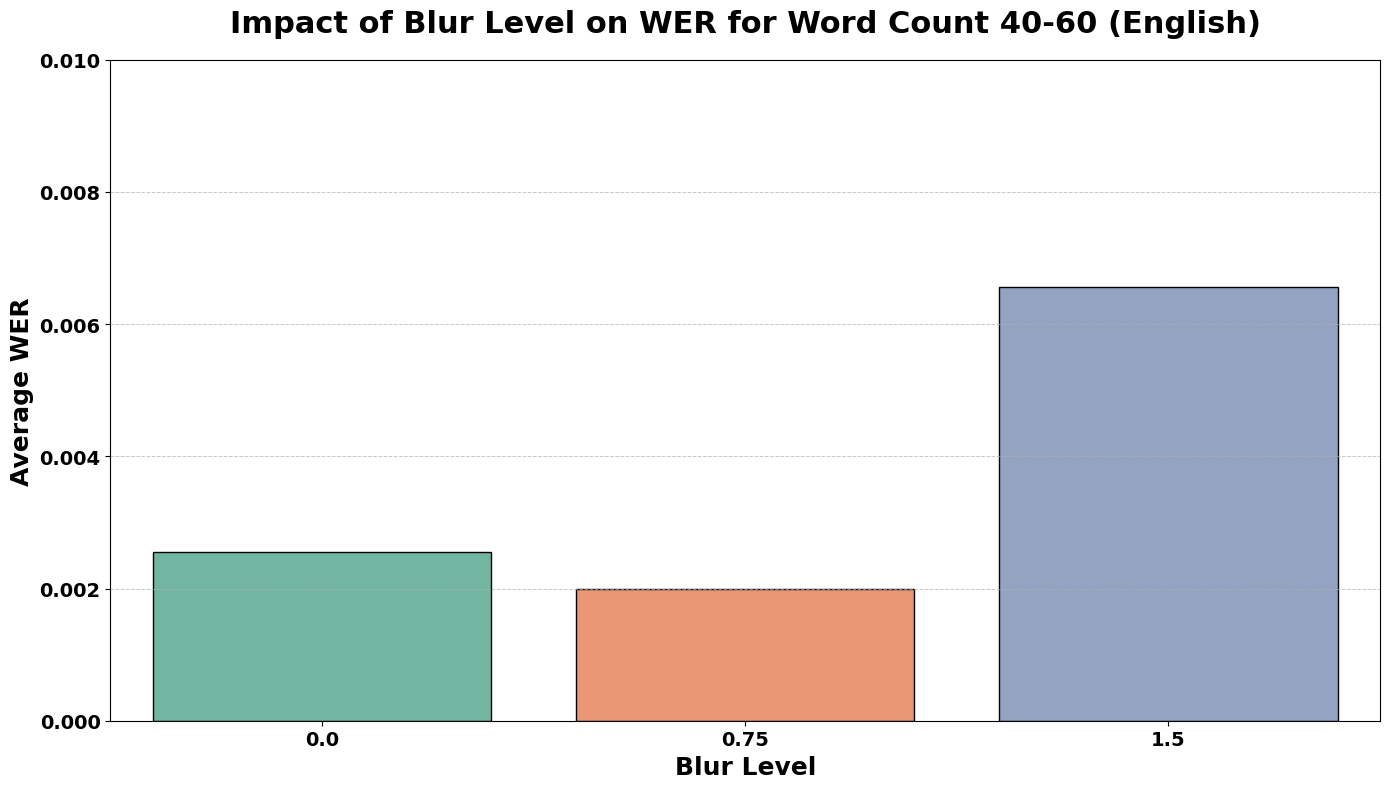

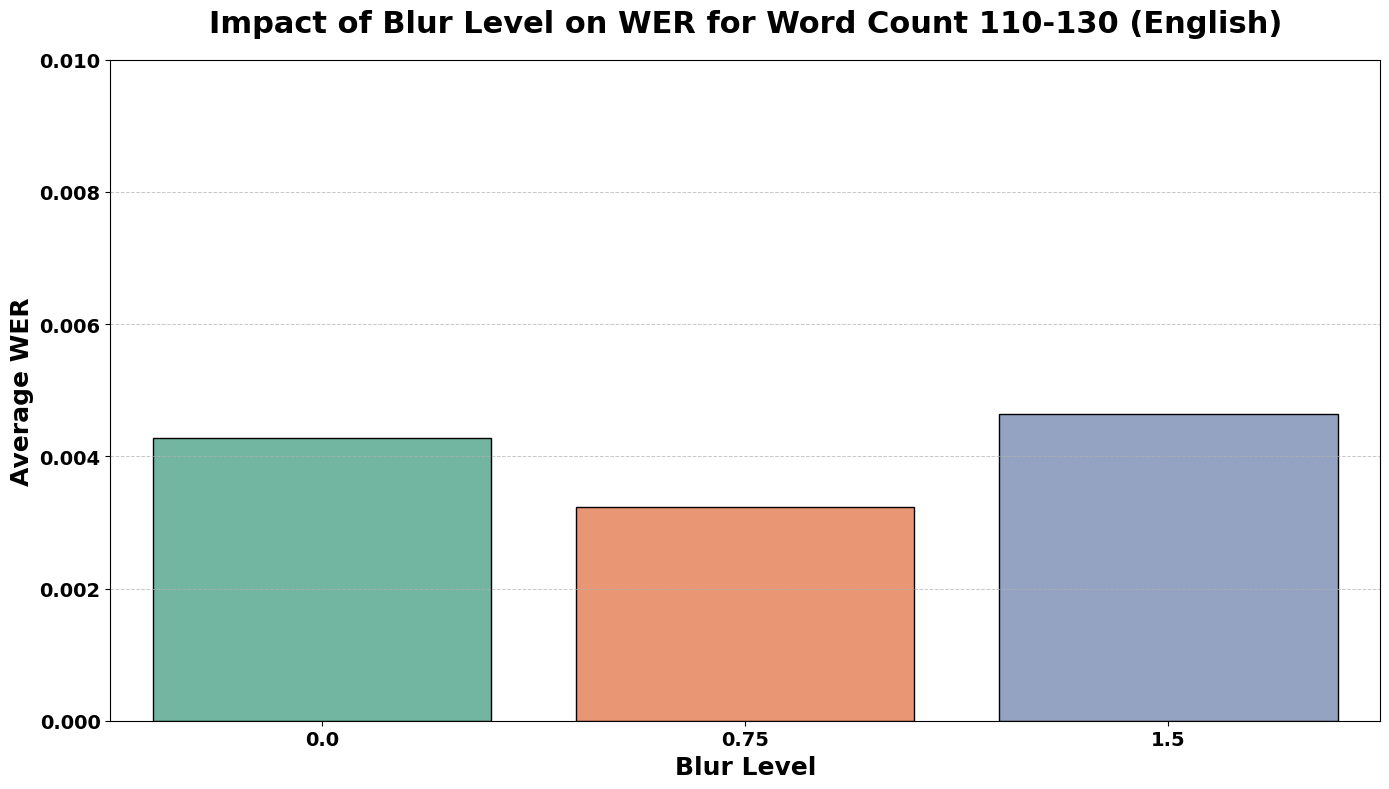

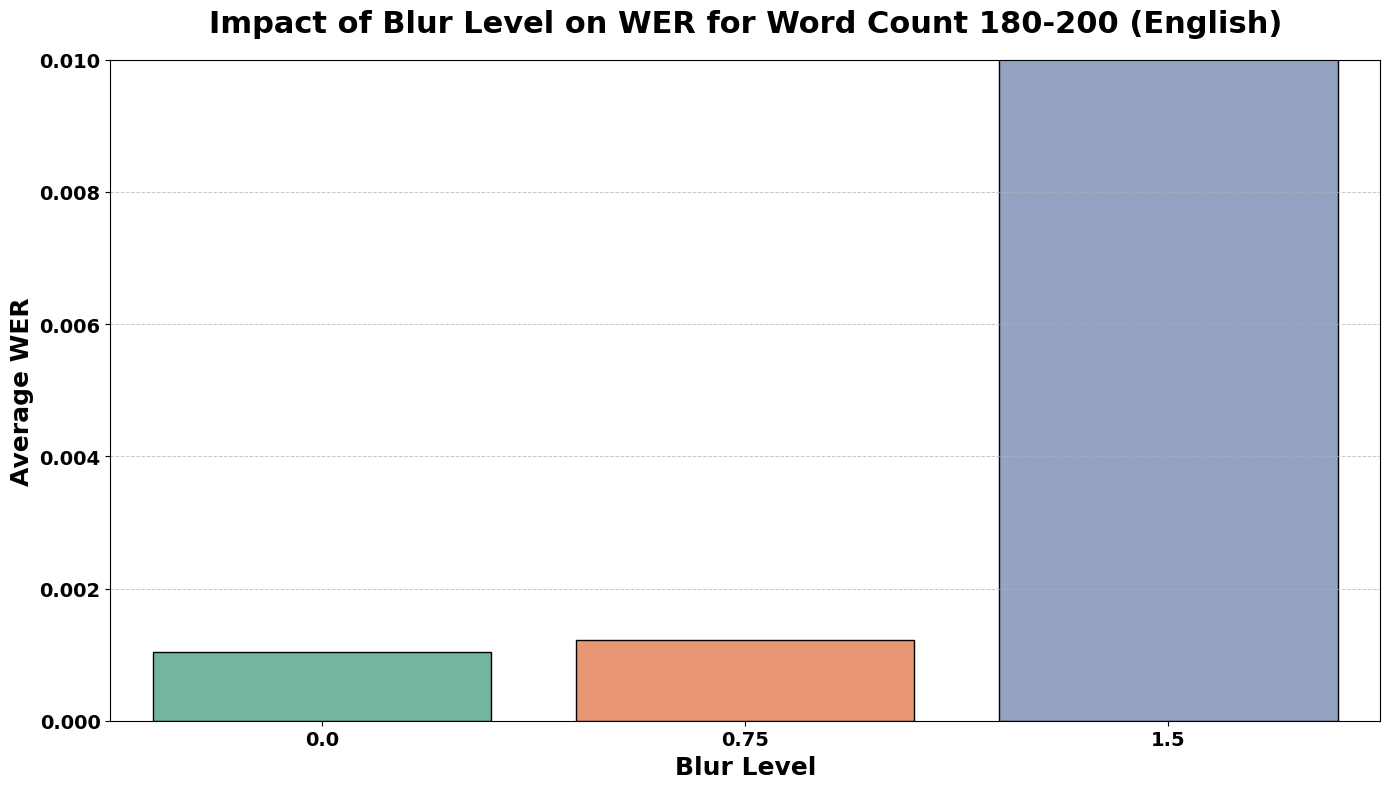

In [35]:
# Function to analyze blur level impact on WER
def analyze_blur_level_impact_english(df, word_count_order, language_name, y_max = 0.01):
    for word_count in word_count_order:
        # Filter data for the current word count
        wc_df = df[df['Word Count Range'] == word_count]

        # Calculate average WER for each blur level
        avg_wer = wc_df.groupby('Blur Level')['WER'].mean().reset_index()

        # Plotting
        plt.figure(figsize=(14, 8))  # Larger figure size for better presentation

        # Create a bar plot
        sns.barplot(
            x=avg_wer['Blur Level'],
            y=avg_wer['WER'],
            palette='Set2',  # Use a vibrant palette for blur levels
            edgecolor='black'
        )

        # Add labels, title, and grid
        plt.title(
            f'Impact of Blur Level on WER for Word Count {word_count} ({language_name})',
            fontsize=22,
            fontweight='bold',
            pad=20
        )
        plt.xlabel('Blur Level', fontsize=18, fontweight='bold')
        plt.ylabel('Average WER', fontsize=18, fontweight='bold')
        plt.xticks(fontsize=14, fontweight='bold')
        plt.yticks(fontsize=14, fontweight='bold')
        plt.ylim(0, y_max)

        # Add gridlines for better readability
        plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)

        # Ensure tight layout
        plt.tight_layout()
        plt.show()

# File path
english_file_path = 'english_inferenced_dataset_with_metrics.csv'
english_df = pd.read_csv(english_file_path)

# Filter the data
filtered_english_df = filter_blur_level_data(english_df, base_font_size, base_background_color, blur_levels, word_count_order)

# Analyze blur level impact on WER
analyze_blur_level_impact_english(filtered_english_df, word_count_order, "English")


## TAJIK Evaluation

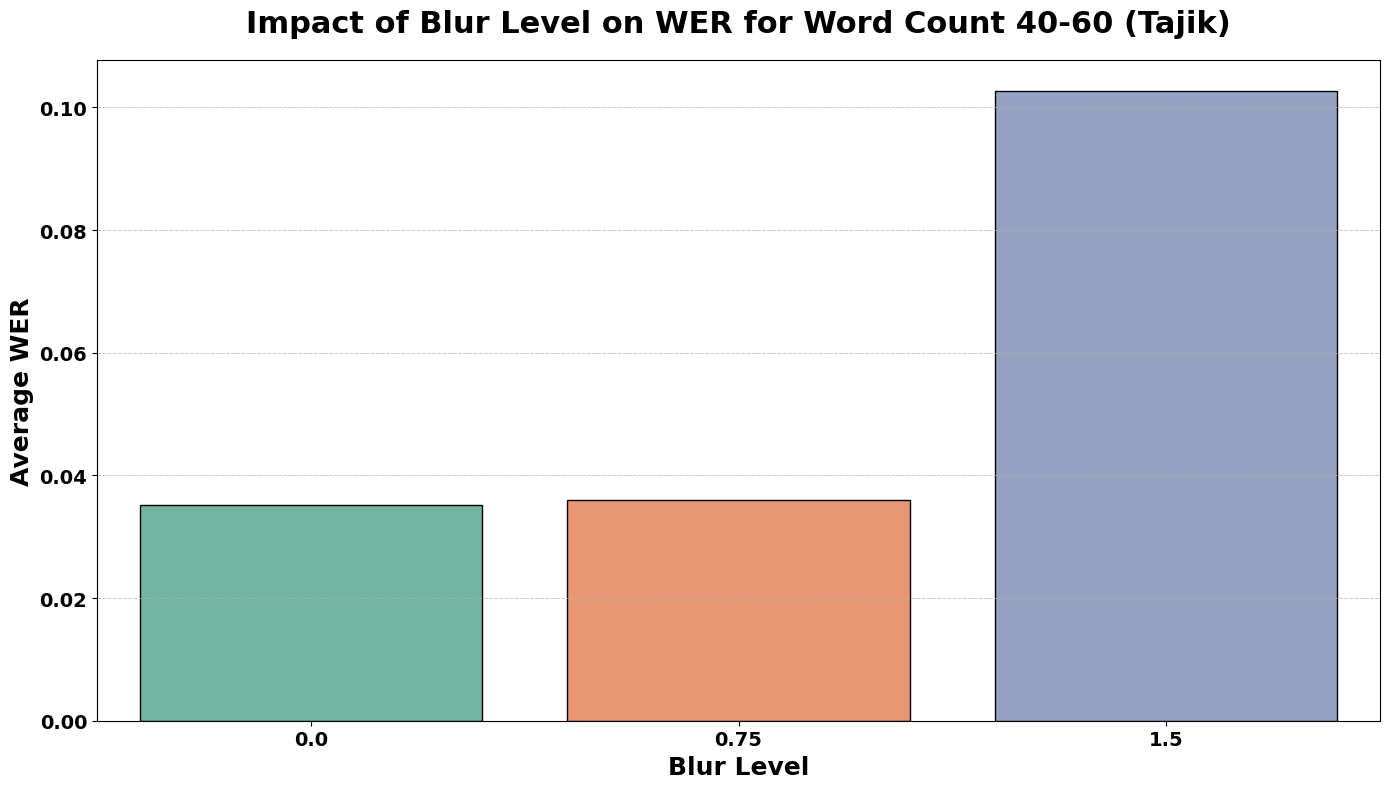

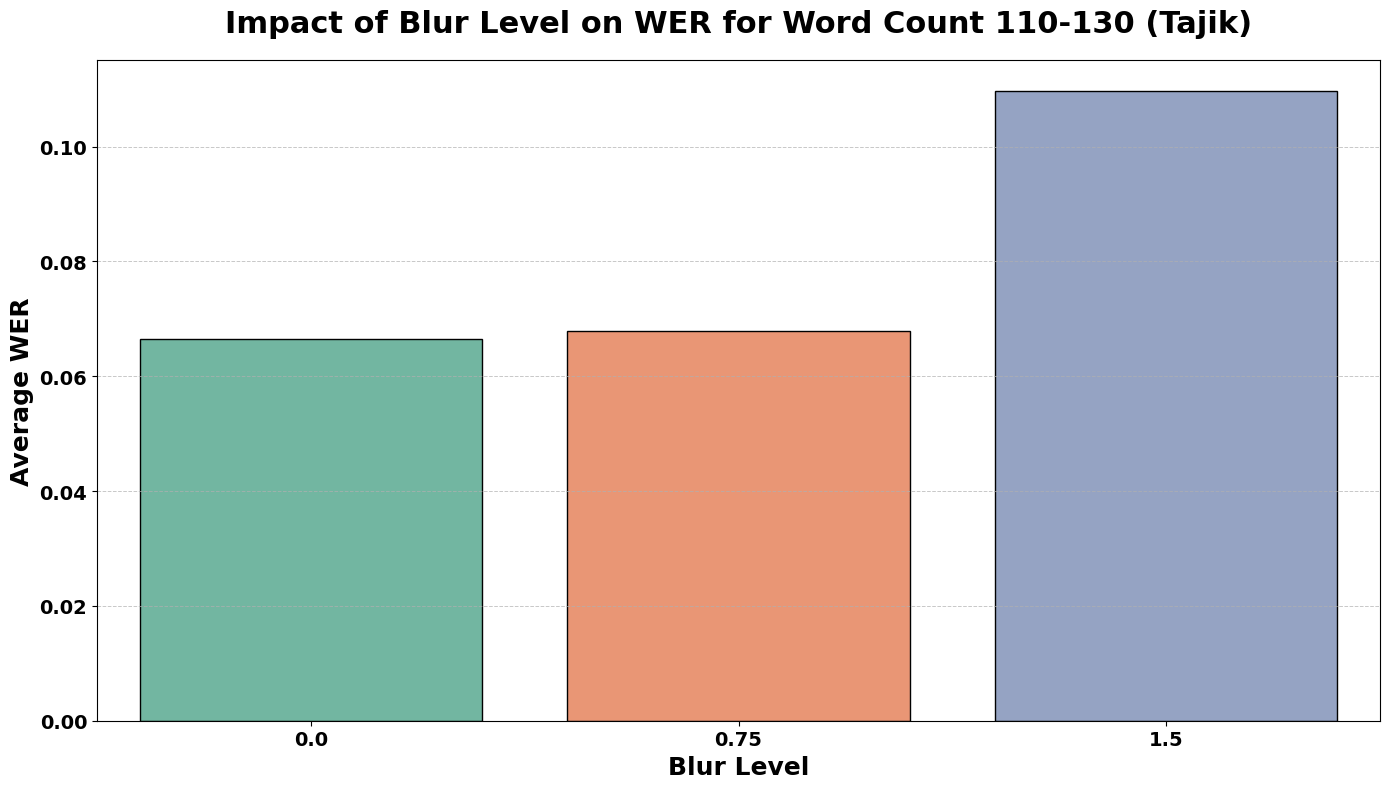

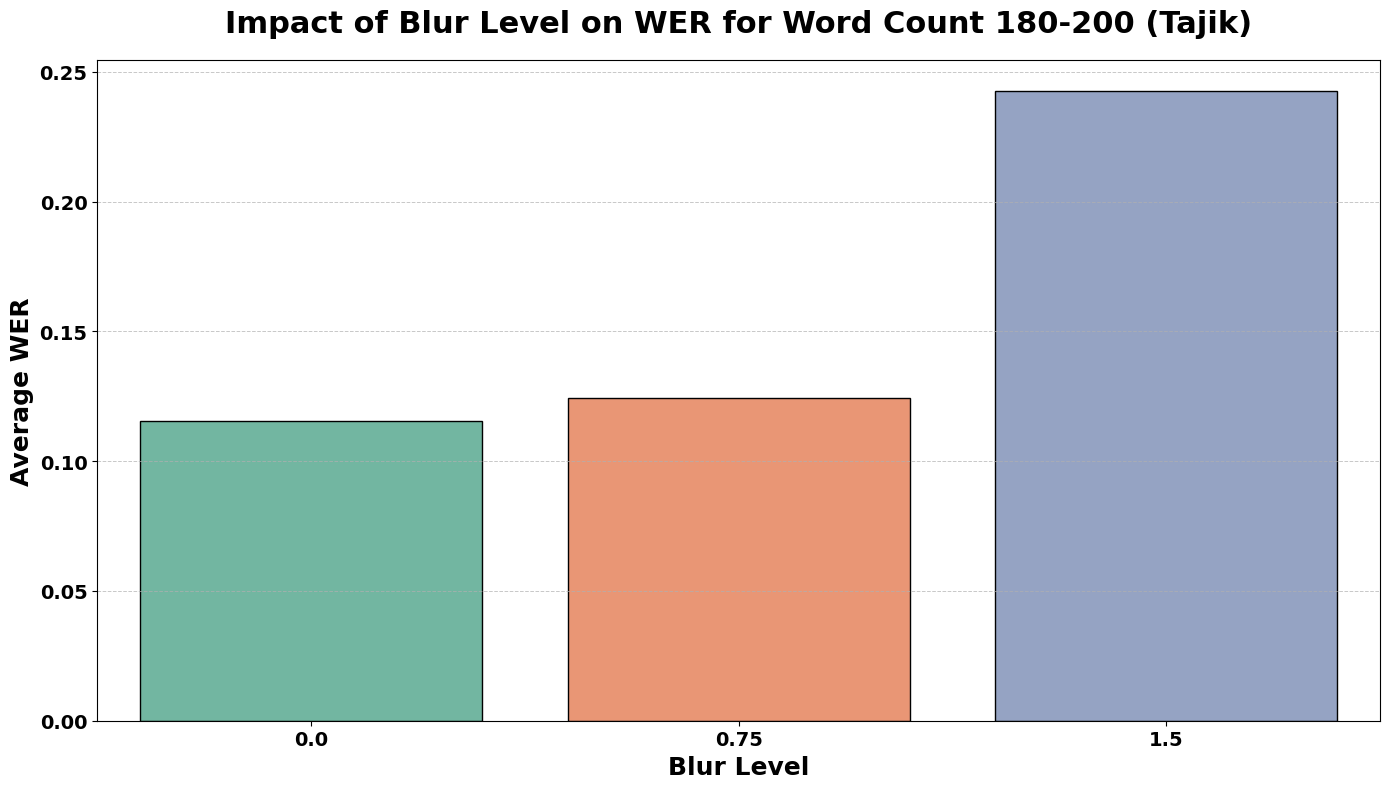

In [22]:
# File path
tajik_file_path = 'tajik_inferenced_dataset_with_metrics.csv'
tajik_df = pd.read_csv(tajik_file_path)

# Filter the data
filtered_tajik_df = filter_blur_level_data(tajik_df, base_font_size, base_background_color, blur_levels, word_count_order)

# Analyze blur level impact on WER
analyze_blur_level_impact(filtered_tajik_df, word_count_order, "Tajik")


## ALBANIAN Evaluation

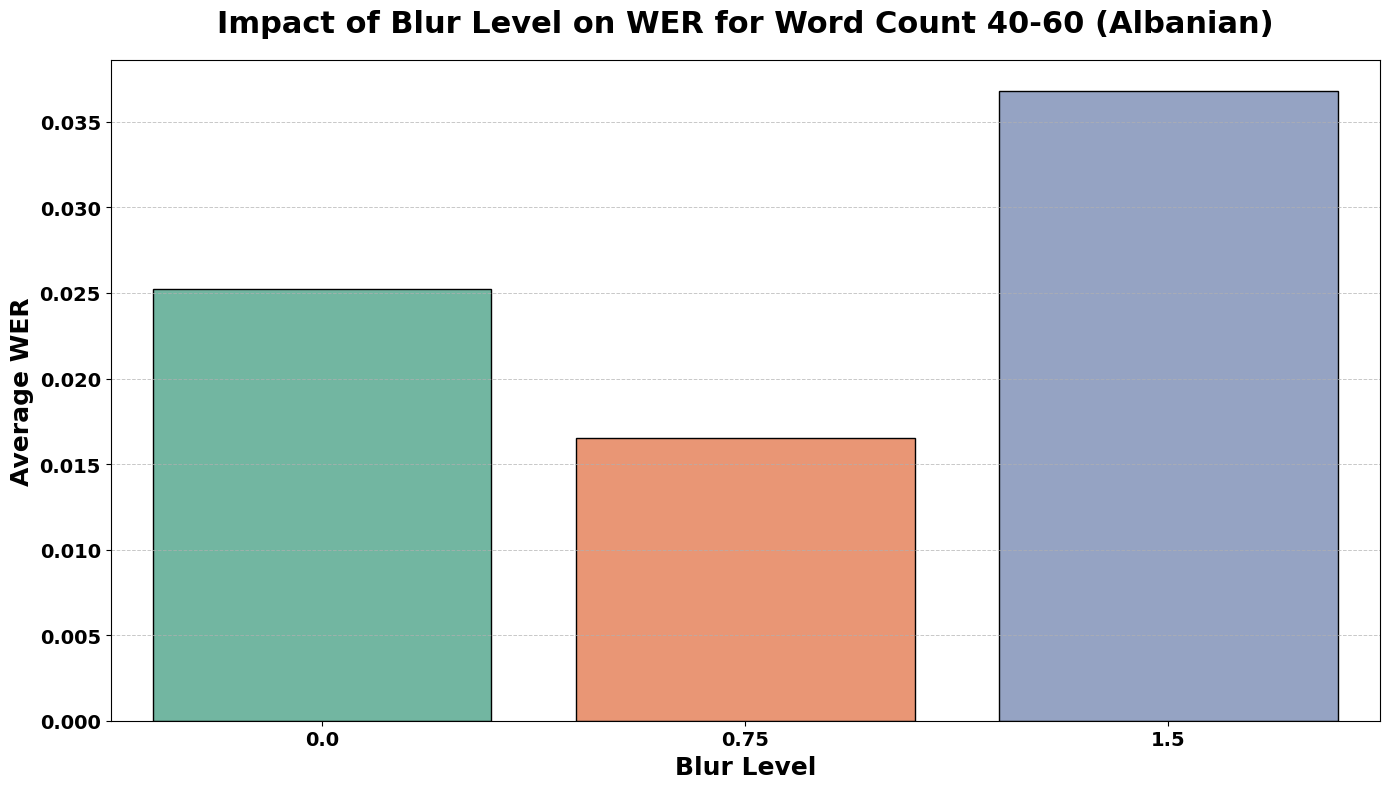

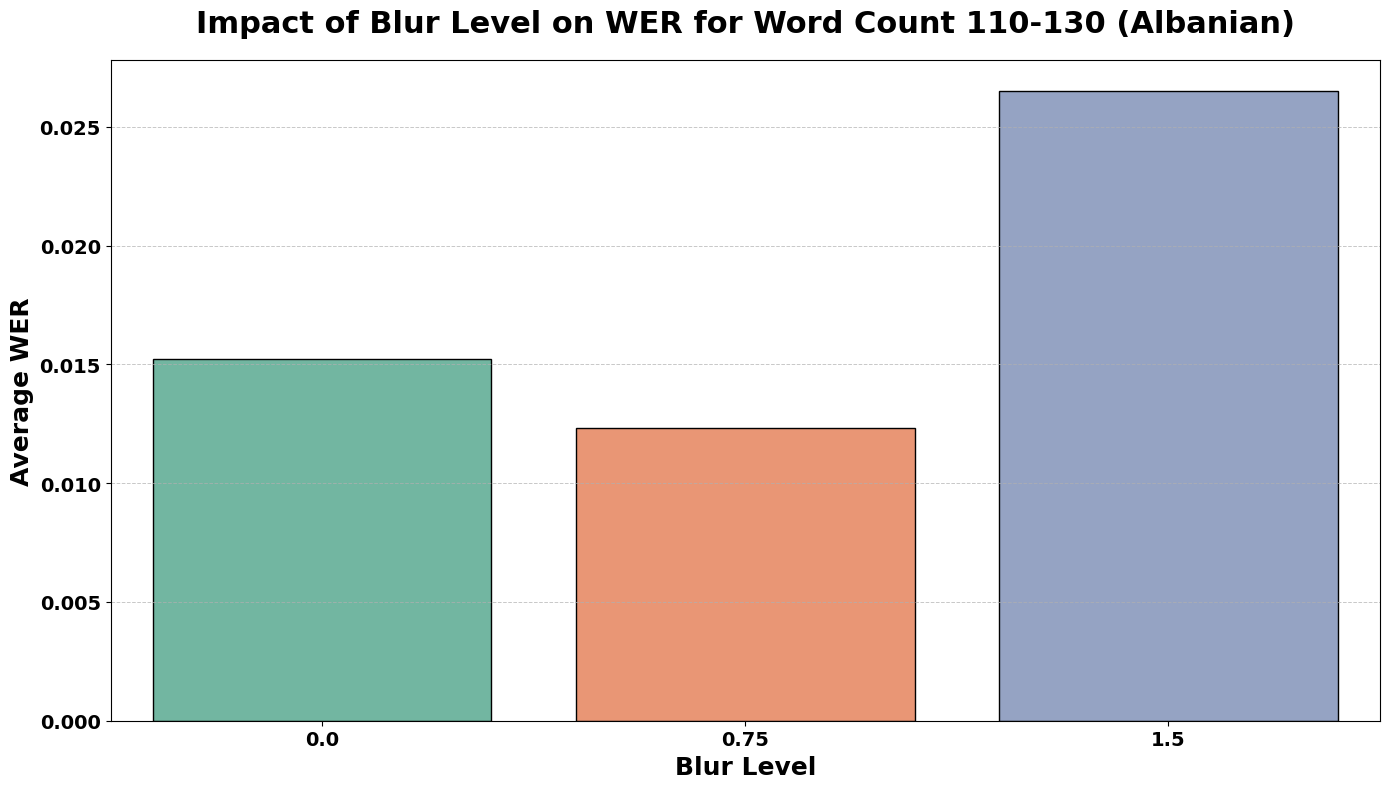

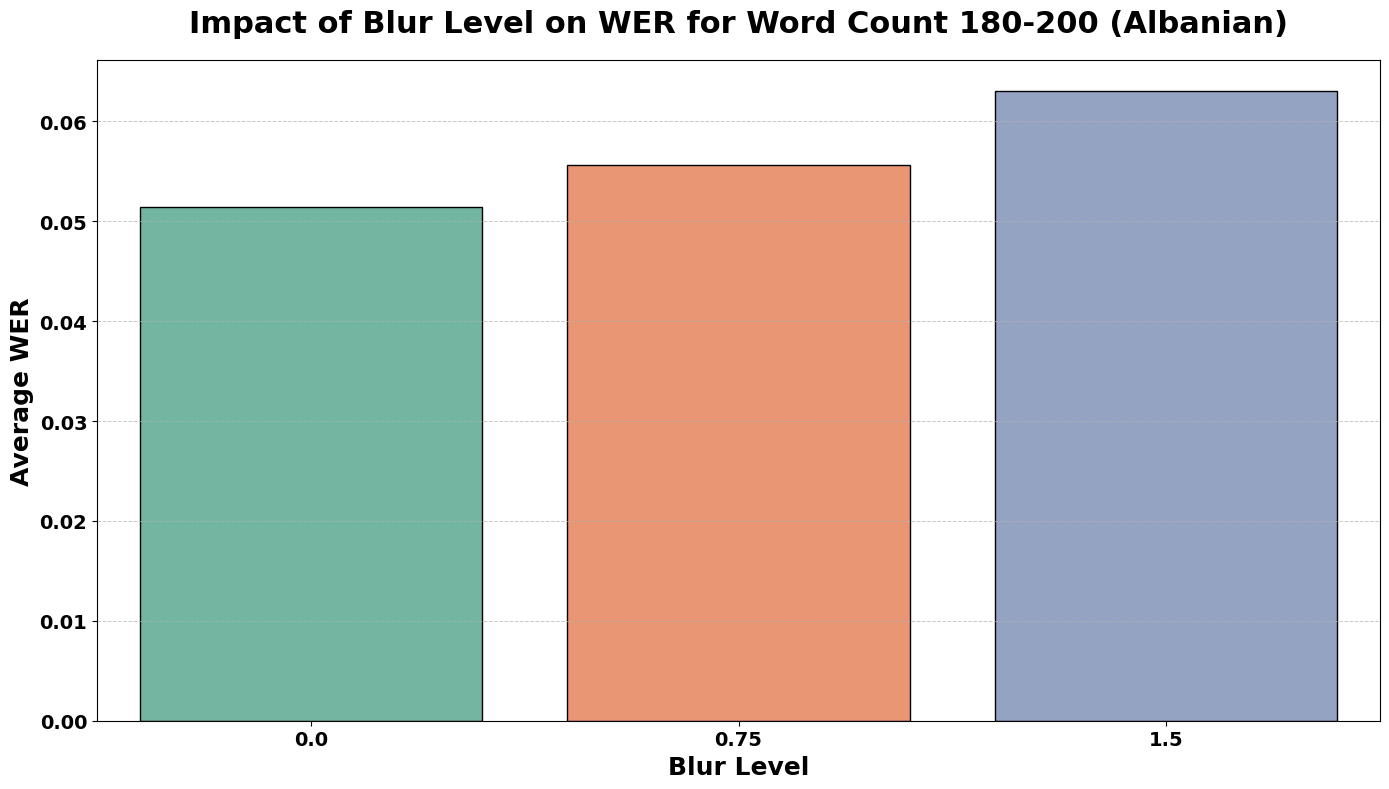

In [23]:
# File path
albanian_file_path = 'albanian_inferenced_dataset_with_metrics.csv'
albanian_df = pd.read_csv(albanian_file_path)

# Filter the data
filtered_albanian_df = filter_blur_level_data(albanian_df, base_font_size, base_background_color, blur_levels, word_count_order)

# Analyze blur level impact on WER
analyze_blur_level_impact(filtered_albanian_df, word_count_order, "Albanian")


## Combined Results

In [24]:
# Combine results from all languages into a single DataFrame for grouped bar plots
combined_results = []

# Helper function to append results to the combined list
def append_language_results_blur(filtered_df, word_count_order, language_name):
    for word_count in word_count_order:
        wc_df = filtered_df[filtered_df['Word Count Range'] == word_count]
        avg_wer = wc_df.groupby('Blur Level')['WER'].mean().reset_index()
        avg_wer['Language'] = language_name
        avg_wer['Word Count Range'] = word_count
        combined_results.append(avg_wer)

# Append results for all languages
append_language_results_blur(filtered_urdu_df, word_count_order, "Urdu")
append_language_results_blur(filtered_tajik_df, word_count_order, "Tajik")
append_language_results_blur(filtered_albanian_df, word_count_order, "Albanian")
append_language_results_blur(filtered_english_df, word_count_order, "English")


# Combine into a single DataFrame
combined_blur_df = pd.concat(combined_results, ignore_index=True)
print("Combined results DataFrame for Blur Level created.")


Combined results DataFrame for Blur Level created.


## Grouped Bar Plots (All Word Counts Combined)

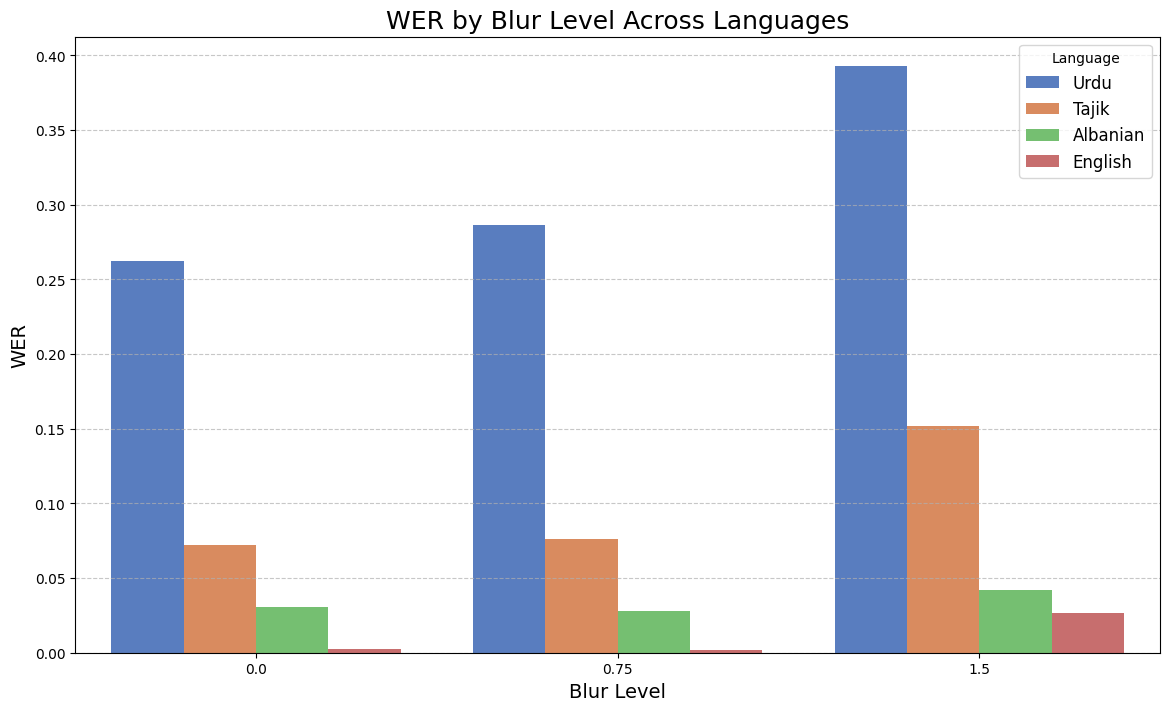

In [25]:
# Grouped bar plot: WER vs Blur Level for each language
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

plt.figure(figsize=(14, 8))
sns.barplot(data=combined_blur_df, x='Blur Level', y='WER', hue='Language', ci=None, palette='muted')
plt.title('WER by Blur Level Across Languages', fontsize=18)
plt.xlabel('Blur Level', fontsize=14)
plt.ylabel('WER', fontsize=14)
plt.legend(title='Language', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



## Grouped Bar Plot (For Each Word Count)

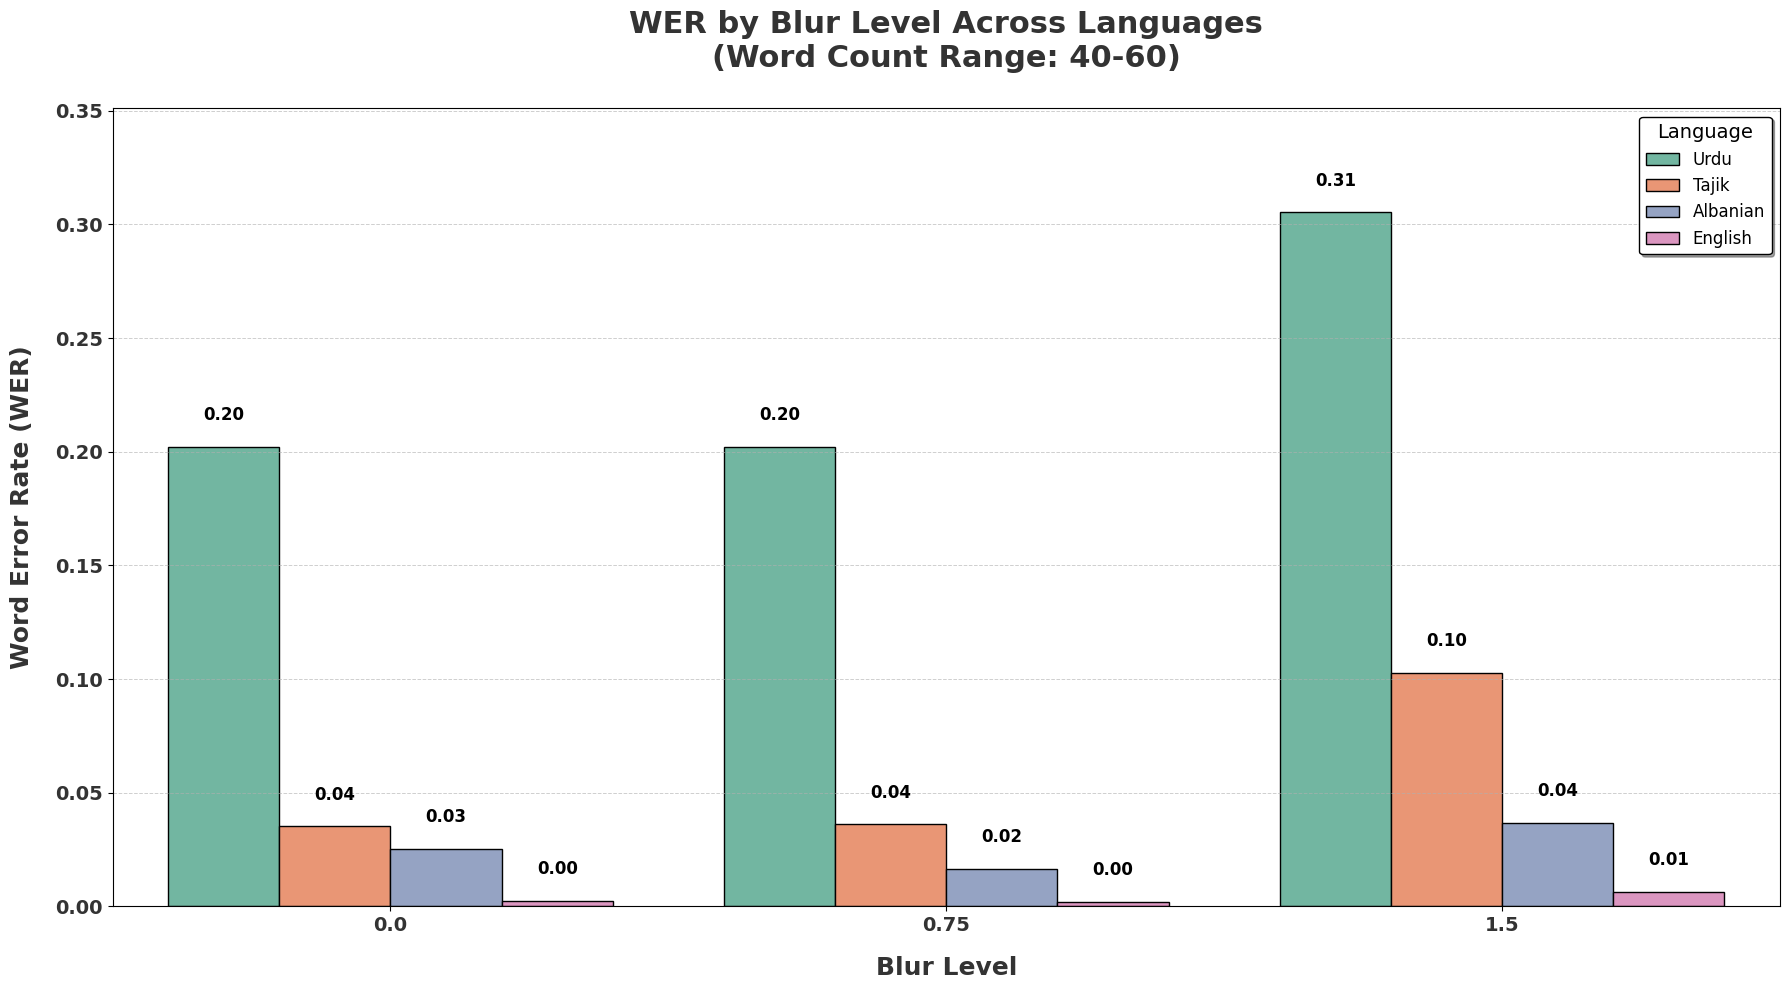

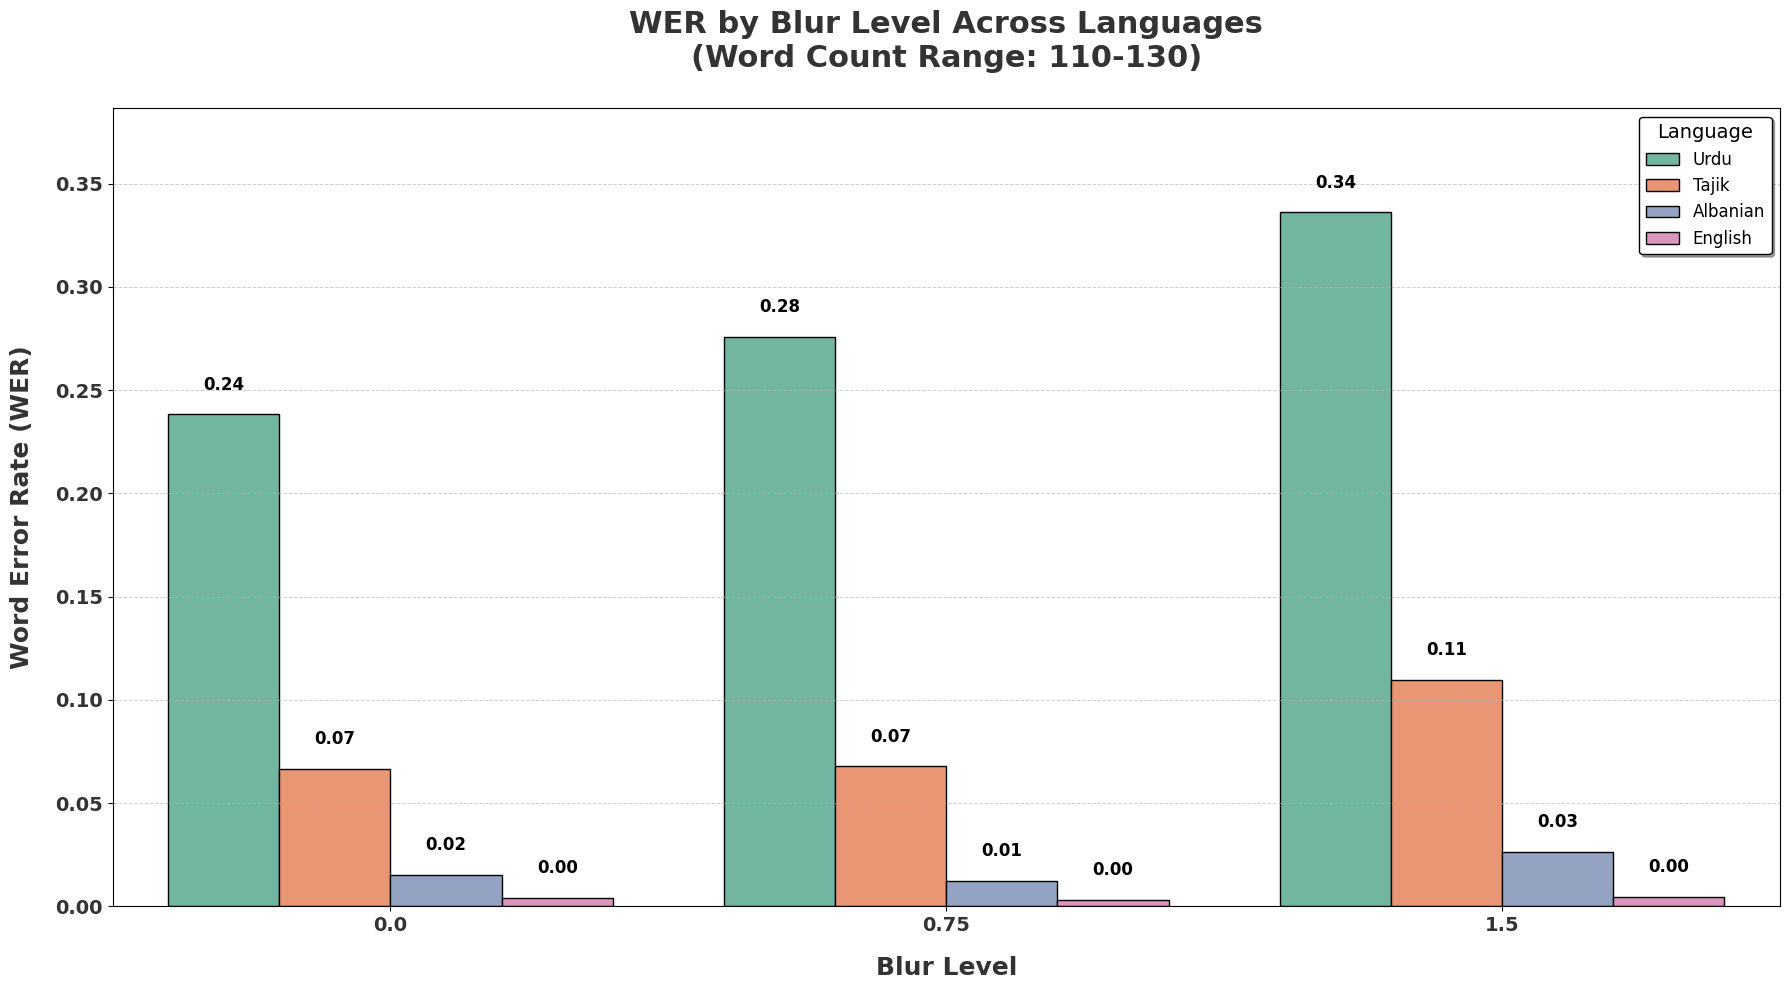

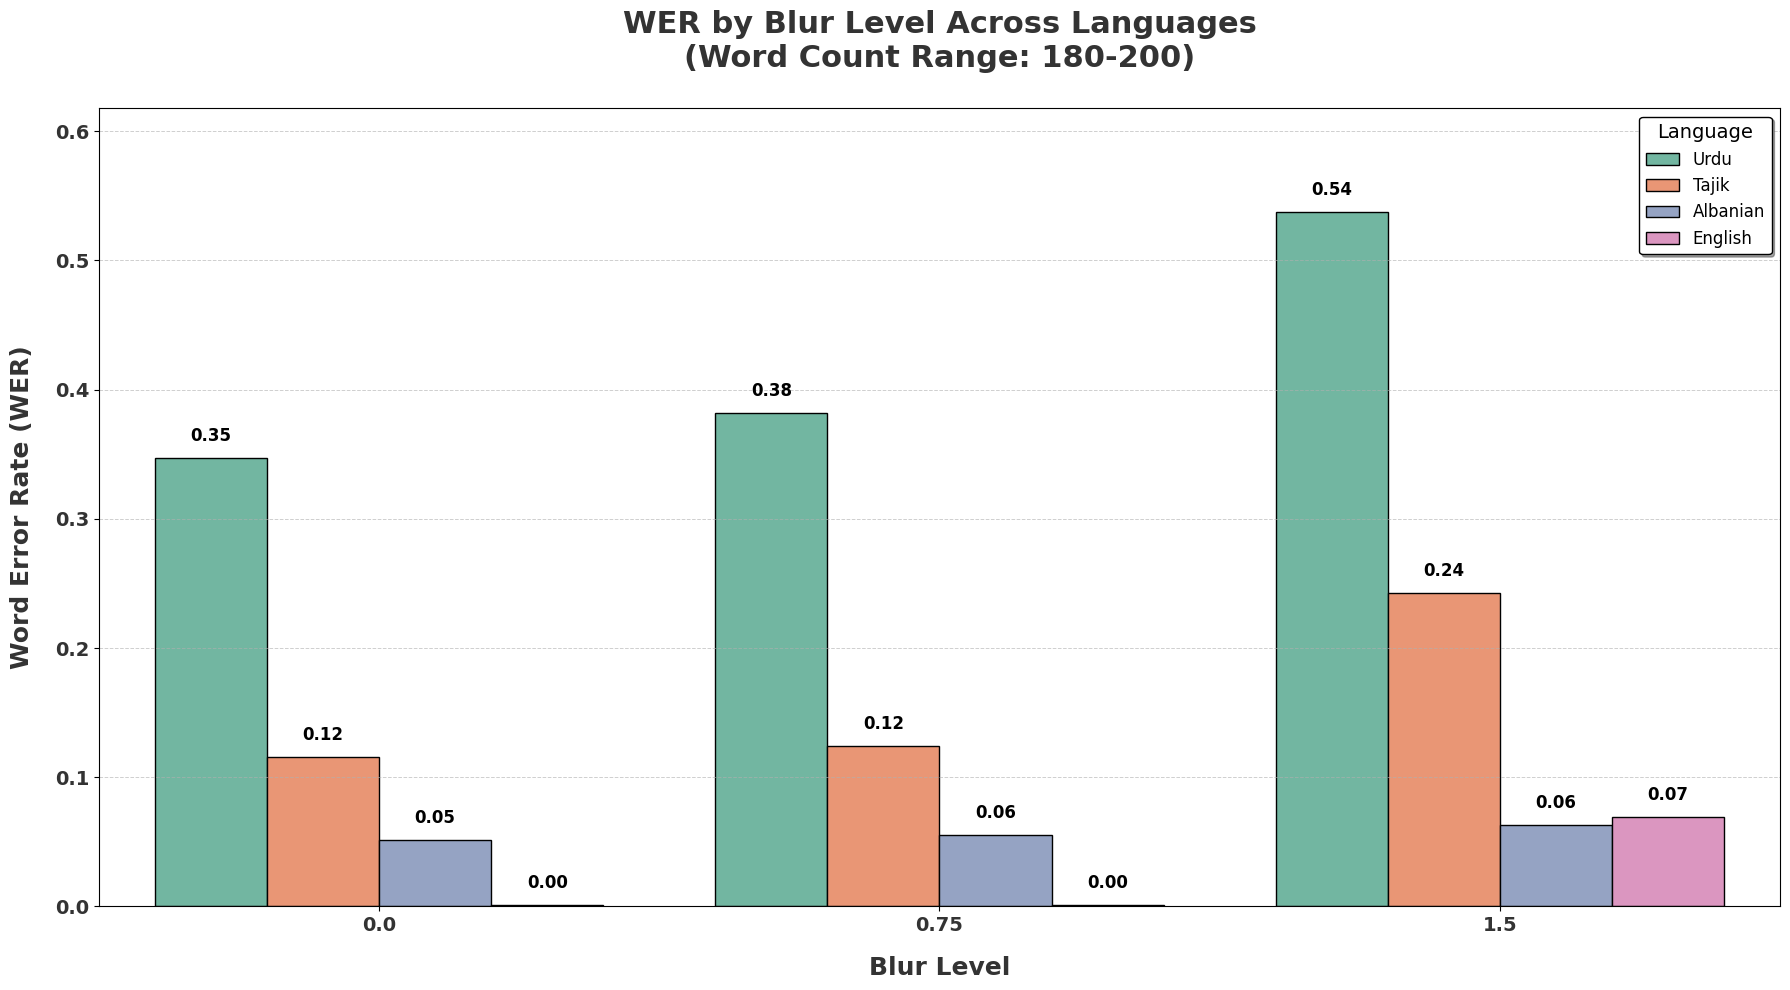

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Grouped Bar Plot for WER by Blur Level
def plot_grouped_bar_wer(df, word_count_order):
    for word_count in word_count_order:
        plt.figure(figsize=(18, 10))  # Larger figure size for better presentation

        # Filter data for the specific word count range
        wc_combined_df = df[df['Word Count Range'] == word_count]
        
        # Create the bar plot
        sns.barplot(
            data=wc_combined_df,
            x='Blur Level',
            y='WER',
            hue='Language',
            ci=None,
            palette=sns.color_palette("Set2", len(wc_combined_df['Language'].unique())),
            edgecolor='black'
        )
        
        # Add annotations above each bar
        for bar in plt.gca().patches:
            bar_height = bar.get_height()
            bar_width = bar.get_width()
            bar_x = bar.get_x()
            if bar_height > 0 and bar_width > 0:
                plt.text(
                    bar_x + bar_width / 2,
                    bar_height + 0.01,
                    f'{bar_height:.2f}',
                    ha='center',
                    va='bottom',
                    fontsize=12,
                    fontweight='bold',
                    color='black'
                )
        
        # Customize the title and axis labels
        plt.title(
            f'WER by Blur Level Across Languages\n(Word Count Range: {word_count})',
            fontsize=22,
            fontweight='bold',
            pad=30,
            color='#333333'
        )
        plt.xlabel('Blur Level', fontsize=18, labelpad=15, fontweight='bold', color='#333333')
        plt.ylabel('Word Error Rate (WER)', fontsize=18, labelpad=15, fontweight='bold', color='#333333')
        
        # Customize the legend
        plt.legend(
            title='Language',
            title_fontsize=14,
            fontsize=12,
            loc='upper right',
            frameon=True,
            facecolor='white',
            edgecolor='black',
            fancybox=True,
            shadow=True
        )
        
        # Add gridlines with a clean look
        plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.6)
        plt.xticks(fontsize=14, fontweight='bold', color='#333333')
        plt.yticks(fontsize=14, fontweight='bold', color='#333333')
        plt.ylim(0, wc_combined_df['WER'].max() * 1.15)
        plt.tight_layout()
        plt.show()

# Call the function for WER
plot_grouped_bar_wer(combined_blur_df, word_count_order)


<h2> GROUPED BAR PLOT FOR CER <h2>

In [38]:
# Combine results from all languages into a single DataFrame for grouped bar plots
combined_results_cer = []

# Helper function to append results to the combined list
def append_language_results_blur_cer(filtered_df, word_count_order, language_name):
    for word_count in word_count_order:
        wc_df = filtered_df[filtered_df['Word Count Range'] == word_count]
        avg_cer = wc_df.groupby('Blur Level')['CER'].mean().reset_index()
        avg_cer['Language'] = language_name
        avg_cer['Word Count Range'] = word_count
        combined_results_cer.append(avg_cer)

# Append results for all languages
append_language_results_blur_cer(filtered_urdu_df, word_count_order, "Urdu")
append_language_results_blur_cer(filtered_tajik_df, word_count_order, "Tajik")
append_language_results_blur_cer(filtered_albanian_df, word_count_order, "Albanian")
append_language_results_blur_cer(filtered_english_df, word_count_order, "English")

# Combine into a single DataFrame
combined_blur_cer_df = pd.concat(combined_results_cer, ignore_index=True)
print("Combined results DataFrame for CER by Blur Level created.")


Combined results DataFrame for CER by Blur Level created.


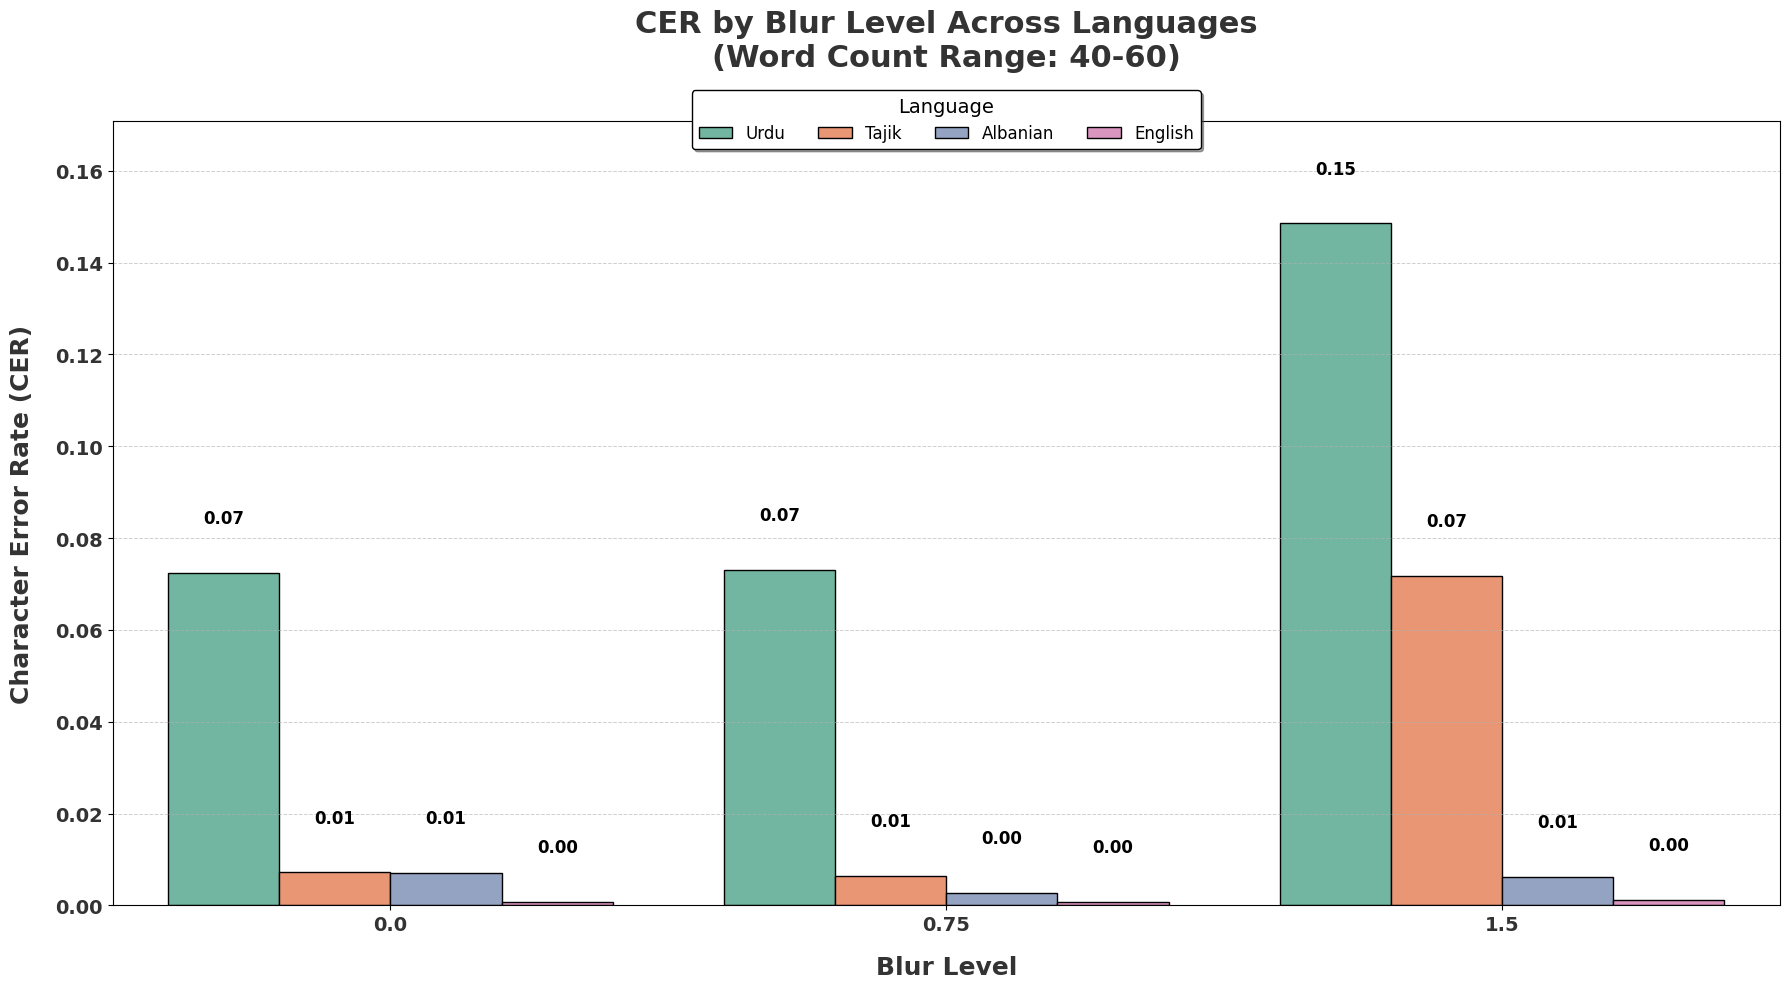

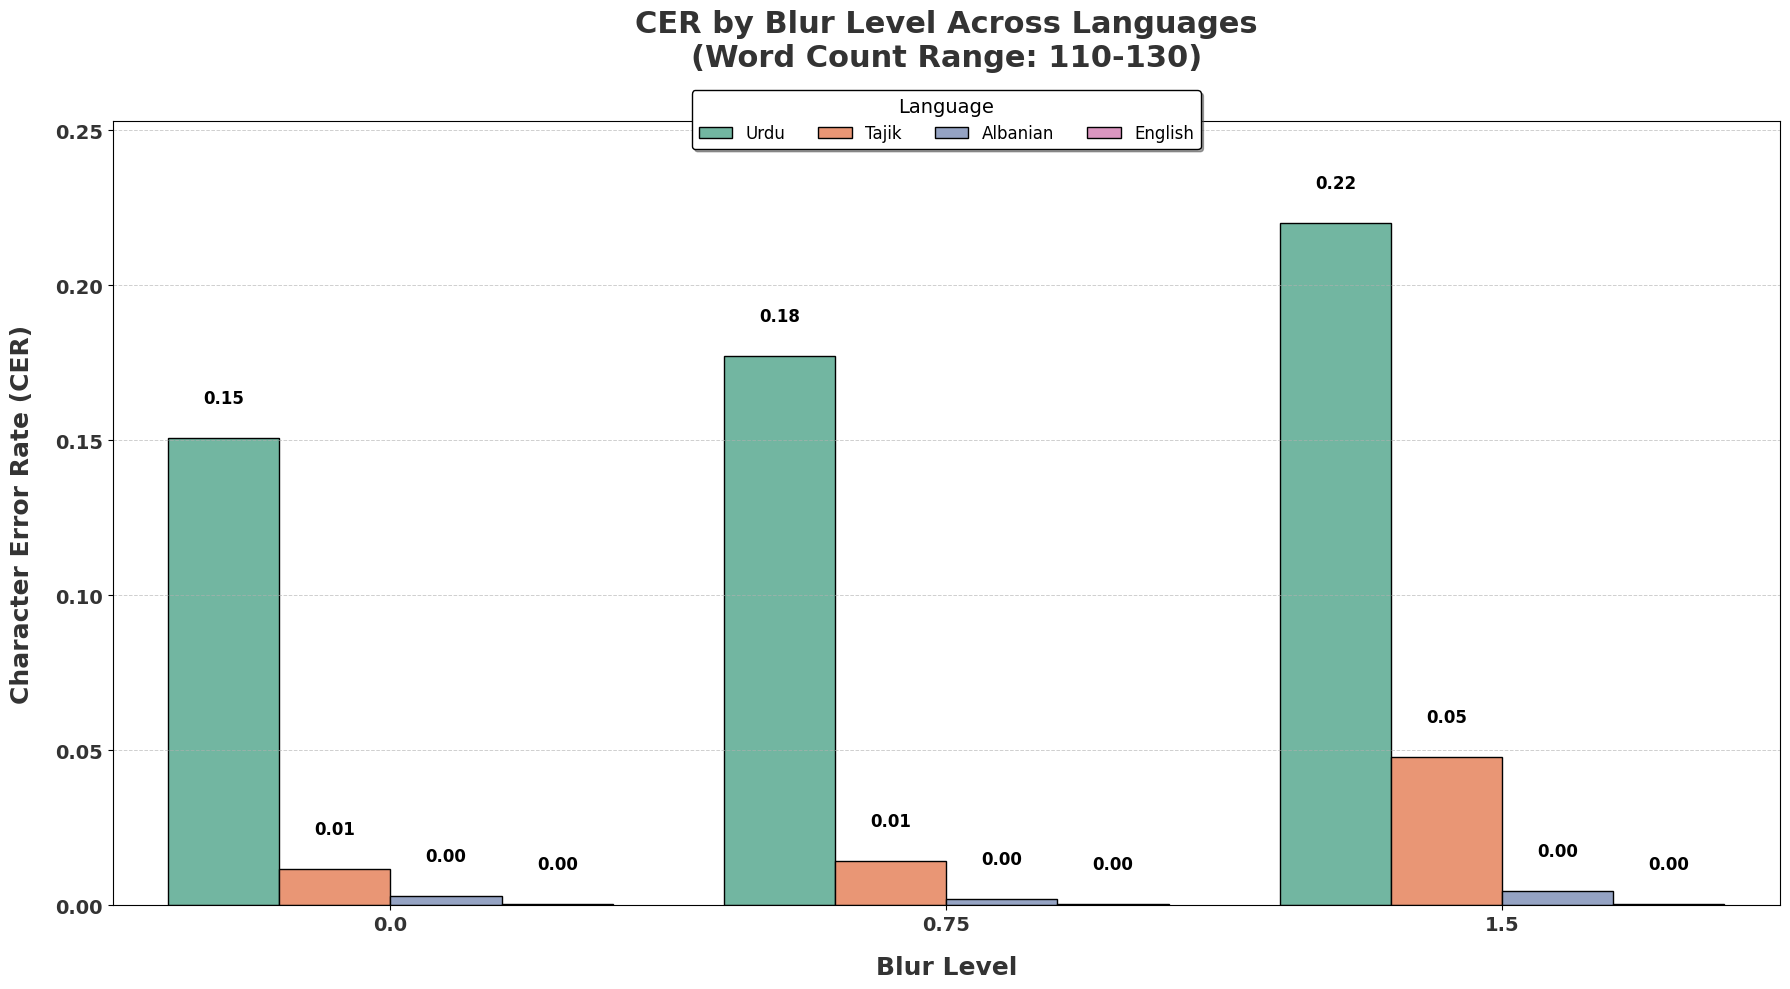

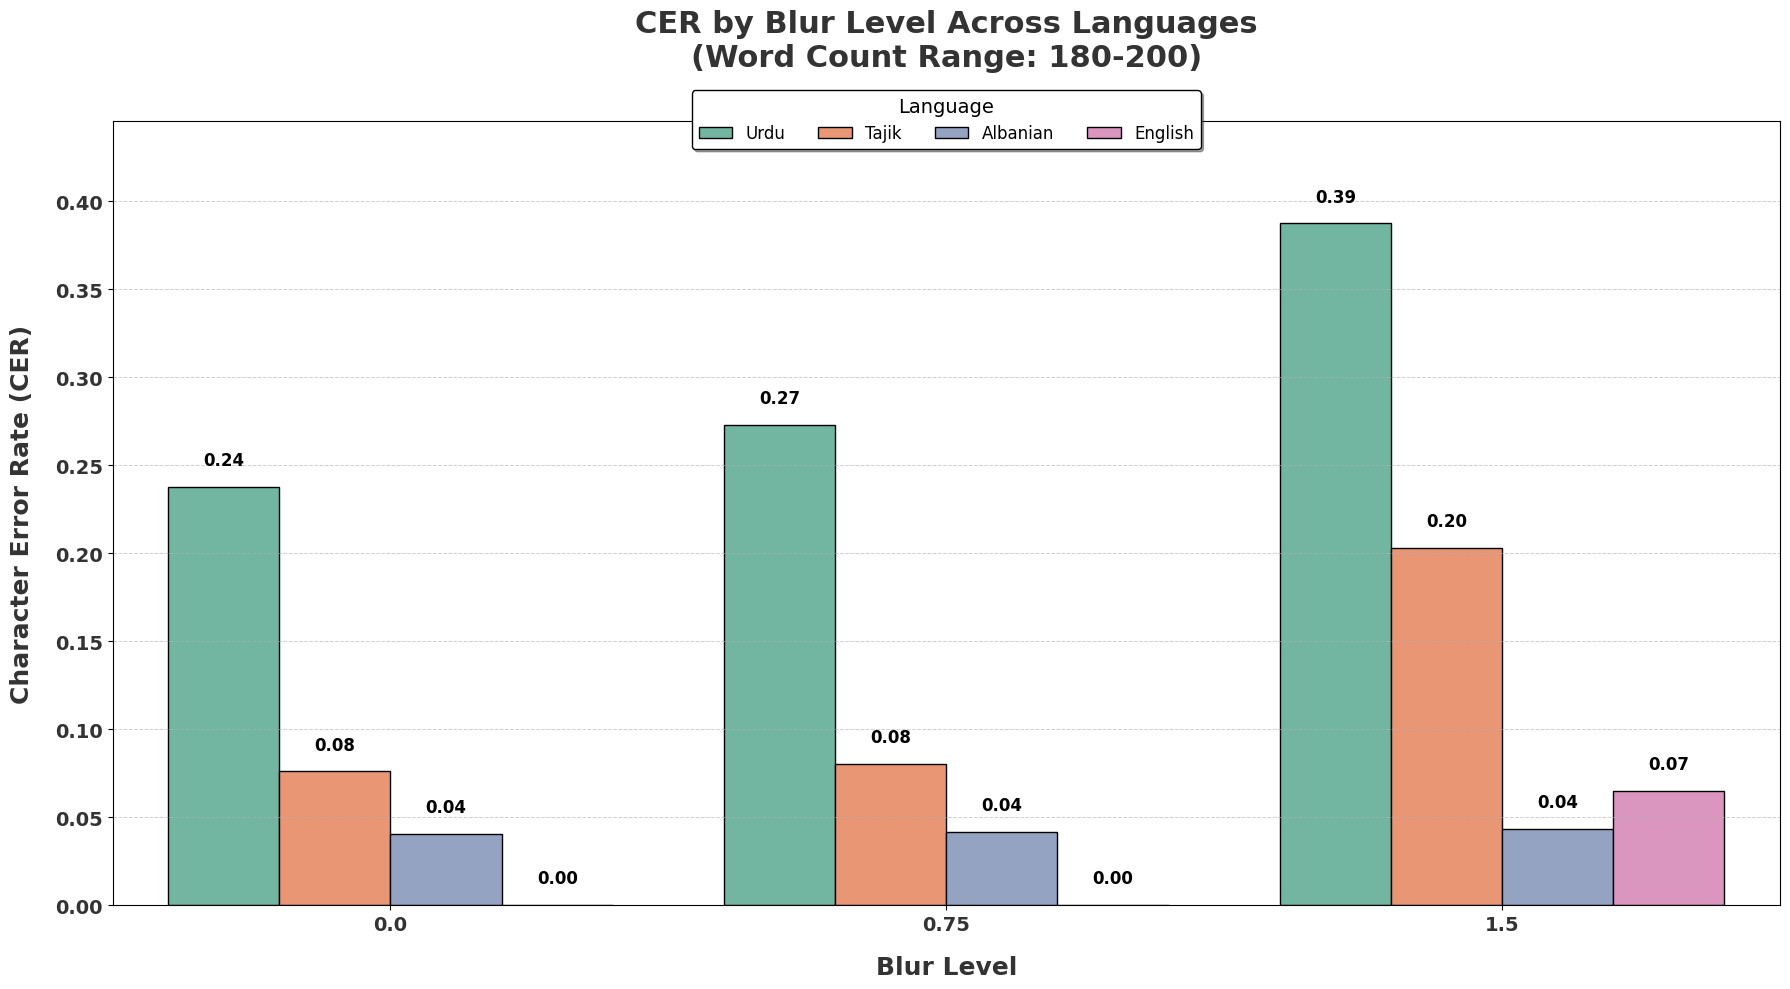

In [41]:
# Import necessary libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Grouped Bar Plot for CER by Blur Level
def plot_grouped_bar_cer(df, word_count_order):
    for word_count in word_count_order:
        plt.figure(figsize=(18, 10))  # Larger figure size for better presentation

        # Filter data for the specific word count range
        wc_combined_df = df[df['Word Count Range'] == word_count]
        
        # Create the bar plot
        sns.barplot(
            data=wc_combined_df,
            x='Blur Level',
            y='CER',
            hue='Language',
            ci=None,
            palette=sns.color_palette("Set2", len(wc_combined_df['Language'].unique())),
            edgecolor='black'
        )
        
        # Add annotations above each bar
        for bar in plt.gca().patches:
            bar_height = bar.get_height()
            bar_width = bar.get_width()
            bar_x = bar.get_x()
            if bar_height > 0 and bar_width > 0:
                plt.text(
                    bar_x + bar_width / 2,
                    bar_height + 0.01,
                    f'{bar_height:.2f}',
                    ha='center',
                    va='bottom',
                    fontsize=12,
                    fontweight='bold',
                    color='black'
                )
        
        # Customize the title and axis labels
        plt.title(
            f'CER by Blur Level Across Languages\n(Word Count Range: {word_count})',
            fontsize=22,
            fontweight='bold',
            pad=40,  # Adjusted padding for better spacing
            color='#333333'
        )
        plt.xlabel('Blur Level', fontsize=18, labelpad=15, fontweight='bold', color='#333333')
        plt.ylabel('Character Error Rate (CER)', fontsize=18, labelpad=15, fontweight='bold', color='#333333')
        
        # Customize the legend and position it below the title
        plt.legend(
            title='Language',
            title_fontsize=14,
            fontsize=12,
            loc='upper center',
            bbox_to_anchor=(0.5, 1.05),  # Centered legend below the title
            frameon=True,
            facecolor='white',
            edgecolor='black',
            fancybox=True,
            shadow=True,
            ncol=len(wc_combined_df['Language'].unique())  # Arrange legend in a single row
        )
        
        # Add gridlines with a clean look
        plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.6)
        plt.xticks(fontsize=14, fontweight='bold', color='#333333')
        plt.yticks(fontsize=14, fontweight='bold', color='#333333')
        plt.ylim(0, wc_combined_df['CER'].max() * 1.15)
        plt.tight_layout()
        plt.show()

# Call the function for CER
plot_grouped_bar_cer(combined_blur_cer_df, word_count_order)

## Line Plots (For Each Word Count)

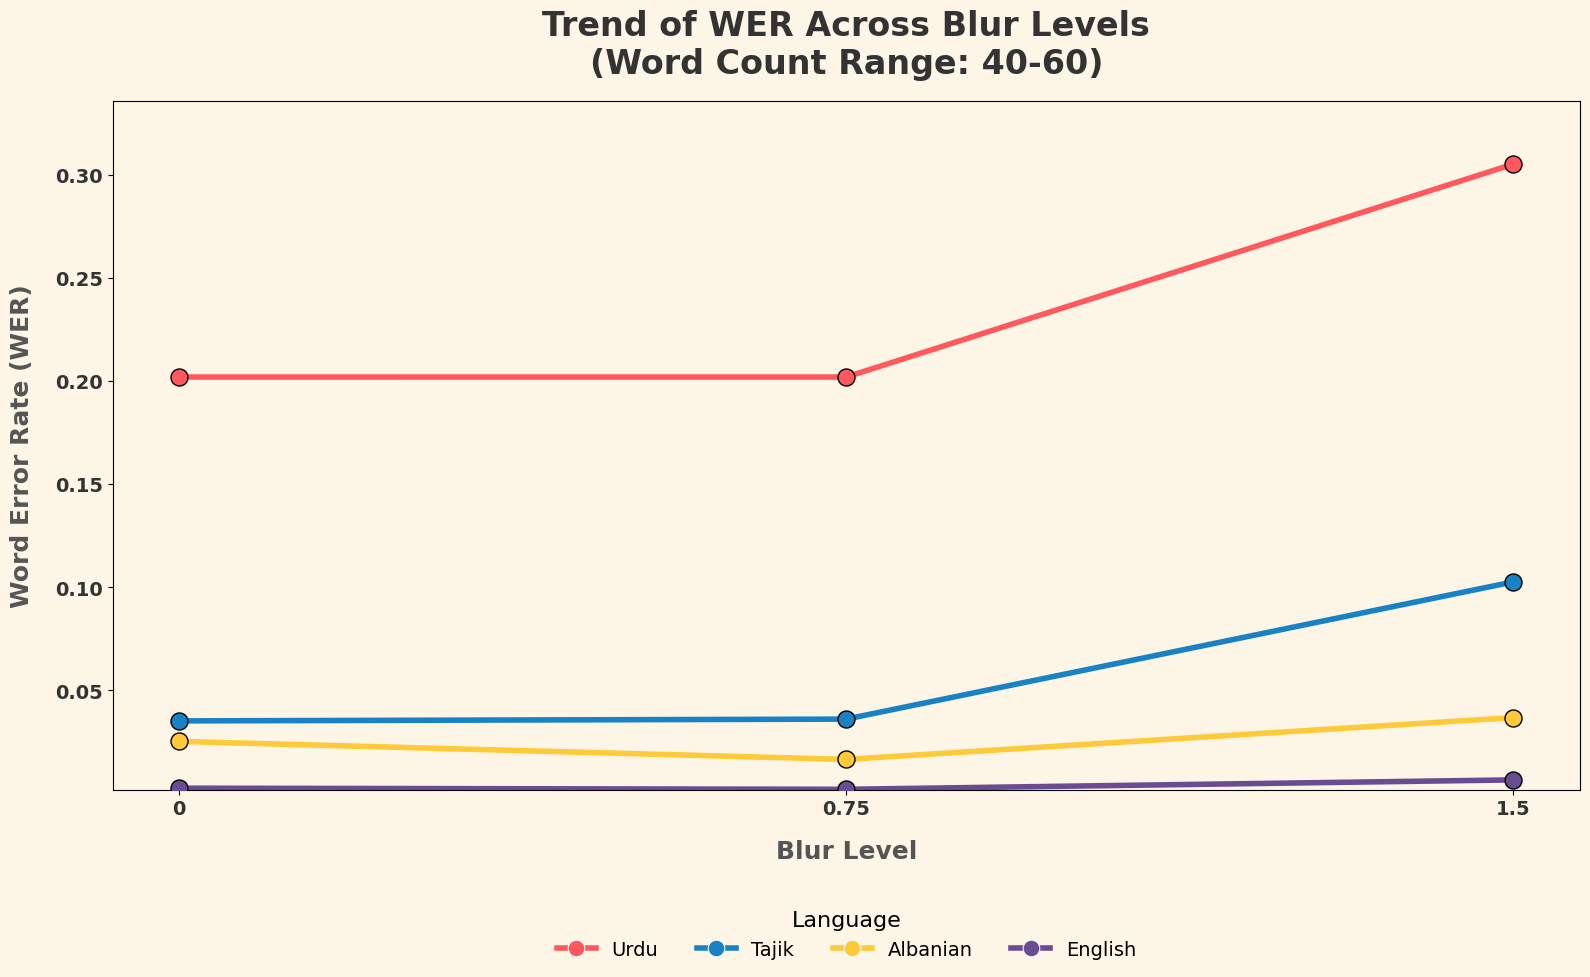

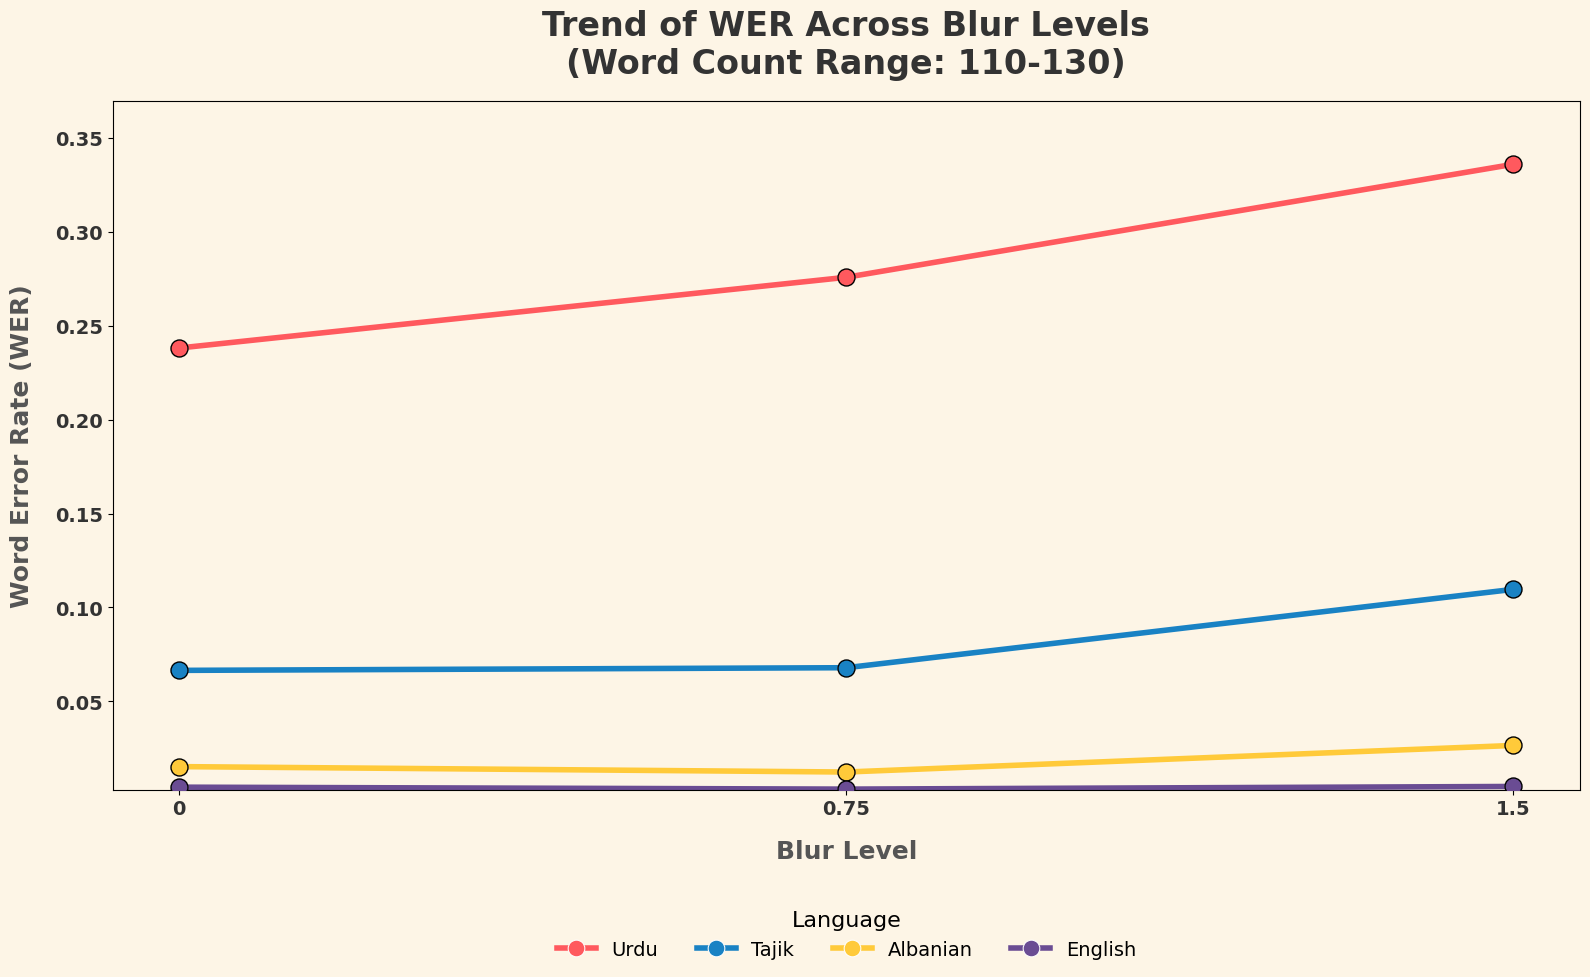

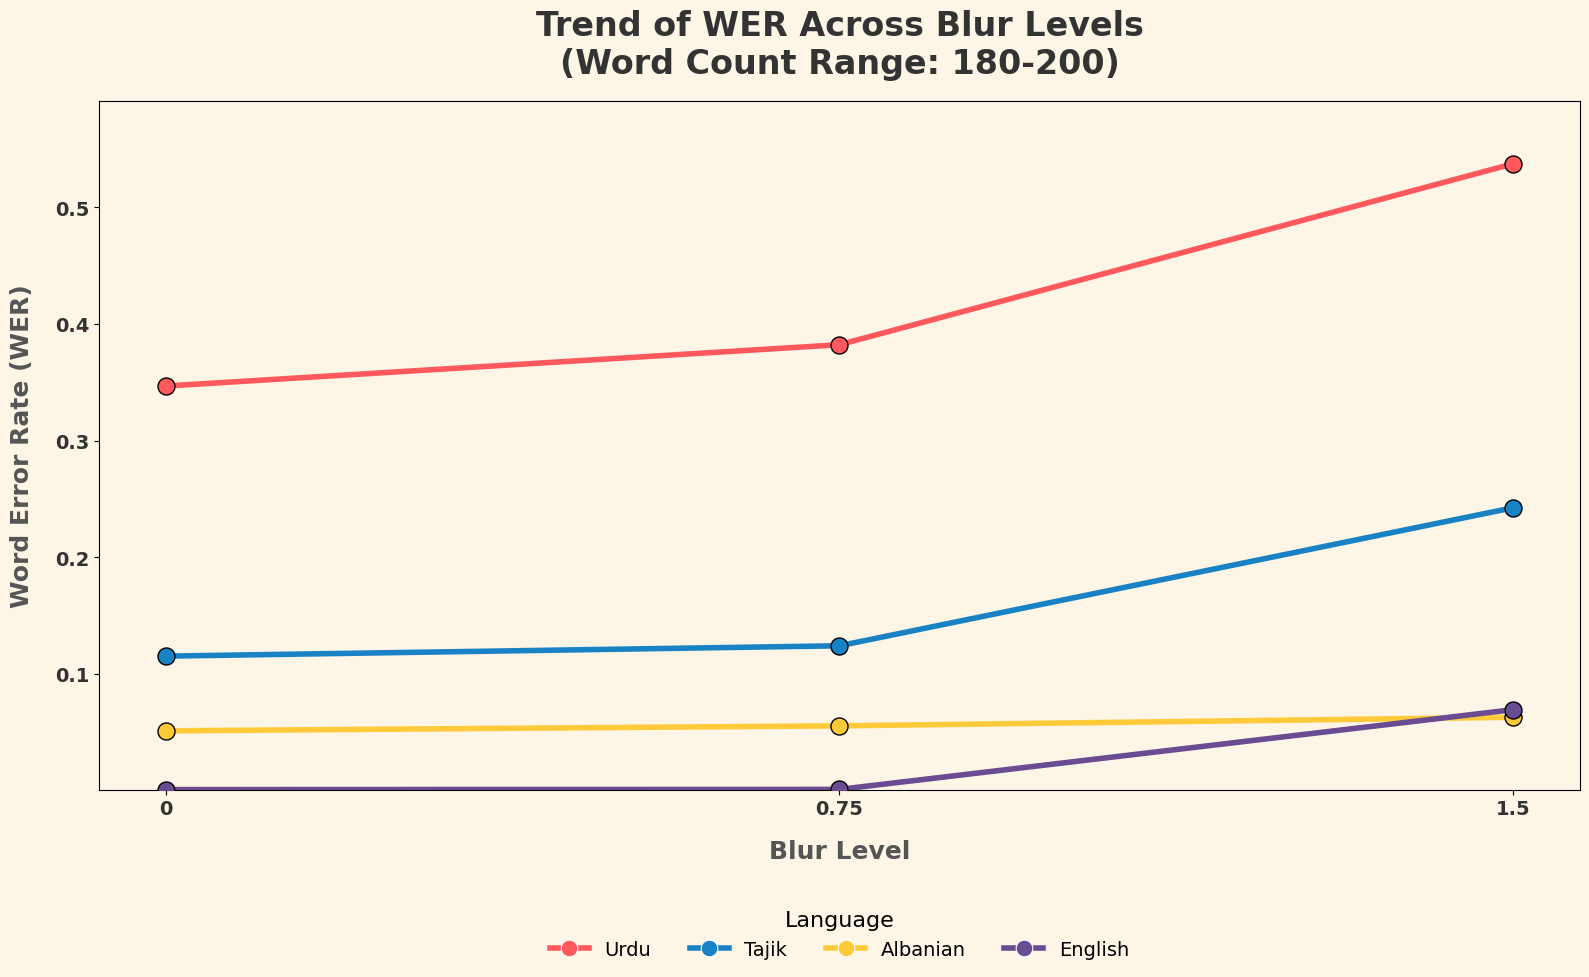

In [27]:
# Enhanced Line Plot for WER Trends Across Blur Levels
def plot_line_wer_blur_infographic(df, word_count_order):
    for word_count in word_count_order:
        plt.figure(figsize=(16, 10))  # Larger figure for infographic presentation

        # Filter data for the specific word count range
        wc_combined_blur_df = df[df['Word Count Range'] == word_count]

        # Create the line plot
        sns.lineplot(
            data=wc_combined_blur_df,
            x='Blur Level',
            y='WER',
            hue='Language',
            marker='o',
            palette=['#FF595E', '#1982C4', '#FFCA3A', '#6A4C93'],  # Vibrant and distinct colors
            linewidth=4,  # Thicker lines
            markersize=12  # Larger markers
        )

        # Customize title and labels
        plt.title(
            f'Trend of WER Across Blur Levels\n(Word Count Range: {word_count})',
            fontsize=24,
            fontweight='bold',
            color='#333333',
            pad=20
        )
        plt.xlabel('Blur Level', fontsize=18, labelpad=15, fontweight='bold', color='#555555')
        plt.ylabel('Word Error Rate (WER)', fontsize=18, labelpad=15, fontweight='bold', color='#555555')

        # Enhance legend
        plt.legend(
            title='Language',
            title_fontsize=16,
            fontsize=14,
            loc='upper center',
            bbox_to_anchor=(0.5, -0.15),  # Place below the plot
            frameon=False,
            ncol=4  # Arrange in a single row
        )

        # Remove gridlines for a cleaner look
        plt.grid(False)

        # Customize the background
        plt.gca().set_facecolor('#FDF5E6')  # Light beige background
        plt.gcf().patch.set_facecolor('#FDF5E6')  # Match figure background

        # Add markers for each point with a contrasting black edge
        for line in plt.gca().lines:
            x_data, y_data = line.get_xdata(), line.get_ydata()
            plt.scatter(
                x_data, y_data,
                color=line.get_color(),
                s=150,  # Larger marker size for infographic look
                edgecolor='black',
                zorder=3
            )

        # Dynamically scale the y-axis to fit the data properly
        y_min = wc_combined_blur_df['WER'].min() * 0.9  # Add a small buffer below the minimum
        y_max = wc_combined_blur_df['WER'].max() * 1.1  # Add a small buffer above the maximum
        plt.ylim(y_min, y_max)

        # Set specific x-axis ticks
        plt.xticks(ticks=[0, 0.75, 1.5], labels=['0', '0.75', '1.5'], fontsize=14, fontweight='bold', color='#333333')
        plt.yticks(fontsize=14, fontweight='bold', color='#333333')

        plt.tight_layout()
        plt.show()

# Call the function for WER trends across Blur Levels
plot_line_wer_blur_infographic(combined_blur_df, word_count_order)


## Radar Plot

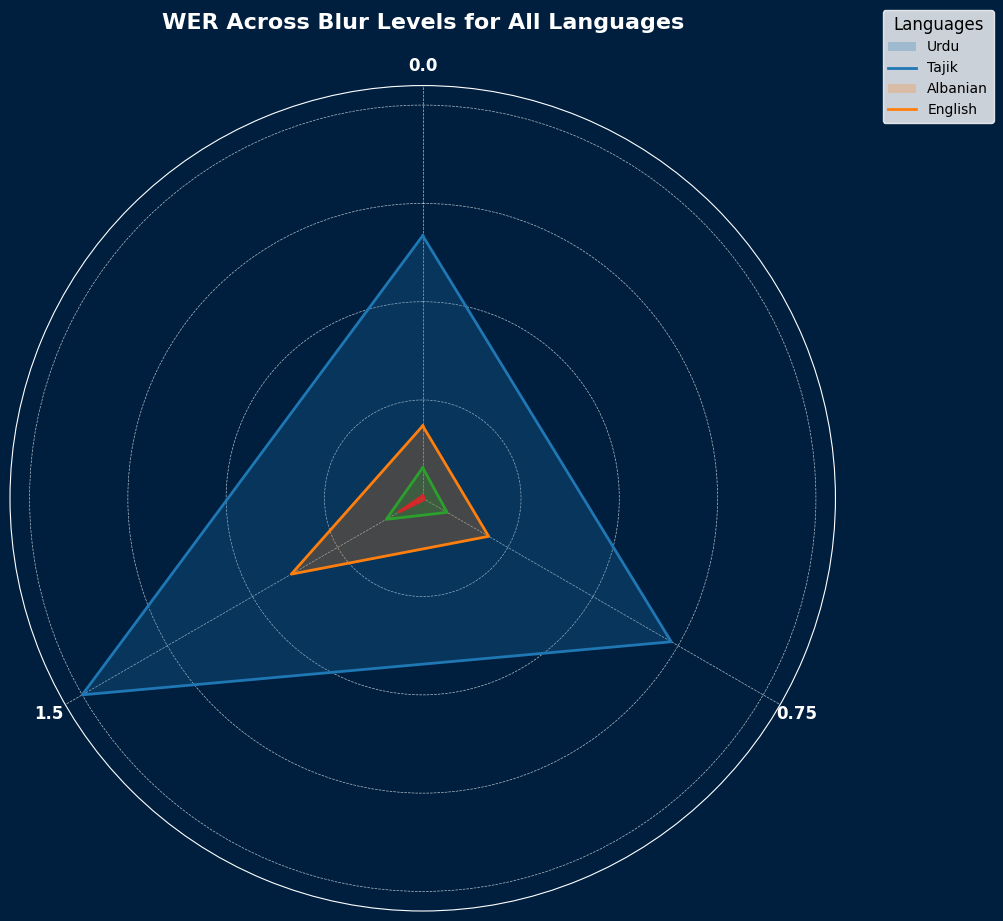

In [28]:
from math import pi
from matplotlib.colors import to_rgba
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Prepare data for radar plot
def prepare_radar_data_blur(df, blur_levels, word_count_order):
    radar_data = {}
    for language in df['Language'].unique():
        lang_data = df[df['Language'] == language]
        radar_data[language] = [lang_data[lang_data['Blur Level'] == blur]['WER'].mean() for blur in blur_levels]
    radar_data['Metric'] = blur_levels
    return pd.DataFrame(radar_data)

# Assuming 'combined_blur_df', 'blur_levels', and 'word_count_order' are defined
radar_blur_df = prepare_radar_data_blur(combined_blur_df, blur_levels, word_count_order)

# Enhanced radar plot with the desired style
def plot_radar(data, title):
    categories = list(data['Metric'])
    num_vars = len(categories)

    # Create figure and axis
    fig = plt.figure(figsize=(10, 10), facecolor='#001f3f')  # Dark blue figure background
    ax = fig.add_subplot(111, polar=True)

    # Create the angle for each category
    angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
    angles += angles[:1]  # Complete the circle

    # Define colormap and transparency
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']  # Vibrant colors
    fill_colors = [to_rgba(c, alpha=0.25) for c in colors]  # Transparent fills

    # Draw radar chart for each language
    for i, language in enumerate(data.columns[:-1]):  # Exclude 'Metric'
        values = data[language].tolist()
        values += values[:1]  # Complete the circle

        # Add transparent fill
        ax.fill(angles, values, color=fill_colors[i], edgecolor='none', zorder=2)
        # Add bold outline
        ax.plot(angles, values, linewidth=2, color=colors[i], zorder=3, label=language)

    # Add gridlines and radial settings
    ax.set_facecolor('#001f3f')  # Match axis background to the figure
    ax.grid(color='#ffffff', linestyle='--', linewidth=0.5, alpha=0.7)  # Thin white grid lines
    ax.set_theta_offset(pi / 2)  # Rotate start angle to top
    ax.set_theta_direction(-1)  # Clockwise layout

    # Configure category labels
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories, fontsize=12, color='white', fontweight='bold')

    # Add radial lines and limits
    ax.set_yticks(np.linspace(0, max(data.iloc[:, :-1].max()), 5))
    ax.set_yticklabels([], color='white')  # Hide radial labels
    for spine in ax.spines.values():
        spine.set_edgecolor('white')

    # Add title
    ax.set_title(title, size=16, pad=20, color='white', fontweight='bold')

    # Add a legend
    ax.legend(data.columns[:-1], loc='upper right', bbox_to_anchor=(1.2, 1.1), fontsize=10, title="Languages",
              title_fontsize=12, facecolor='white', edgecolor='white', labelspacing=0.5)

    plt.tight_layout()
    plt.show()

# Radar plot for Blur Level vs WER
plot_radar(radar_blur_df, 'WER Across Blur Levels for All Languages')


## BLEU Scores

In [29]:
# Function to calculate BLEU scores for blur level analysis
def calculate_bleu(df):
    bleu_scores = []
    for _, row in df.iterrows():
        reference = [str(row['Gold Label']).split()]  # Tokenized reference (ground truth)
        hypothesis = str(row['Response']).split()    # Tokenized hypothesis (OCR output)
        bleu = sentence_bleu(reference, hypothesis)
        bleu_scores.append(bleu)
    df['BLEU'] = bleu_scores
    return df

# Calculate BLEU for each dataset
urdu_bleu_df = calculate_bleu(filtered_urdu_df)
english_bleu_df = calculate_bleu(filtered_english_df)
tajik_bleu_df = calculate_bleu(filtered_tajik_df)
albanian_bleu_df = calculate_bleu(filtered_albanian_df)

# Combine BLEU results for grouped analysis
bleu_combined_results = []

def append_bleu_results_blur(df, word_count_order, language_name):
    for word_count in word_count_order:
        wc_df = df[df['Word Count Range'] == word_count]
        avg_bleu = wc_df.groupby('Blur Level')['BLEU'].mean().reset_index()
        avg_bleu['Language'] = language_name
        avg_bleu['Word Count Range'] = word_count
        bleu_combined_results.append(avg_bleu)

# Append BLEU results for all languages
append_bleu_results_blur(urdu_bleu_df, word_count_order, "Urdu")
append_bleu_results_blur(tajik_bleu_df, word_count_order, "Tajik")
append_bleu_results_blur(albanian_bleu_df, word_count_order, "Albanian")
append_bleu_results_blur(english_bleu_df, word_count_order, "English")


# Combine BLEU results into a single DataFrame
bleu_combined_df = pd.concat(bleu_combined_results, ignore_index=True)
print("Combined BLEU results DataFrame created.")


Combined BLEU results DataFrame created.


## BLEU Score Grouped Bar Plots

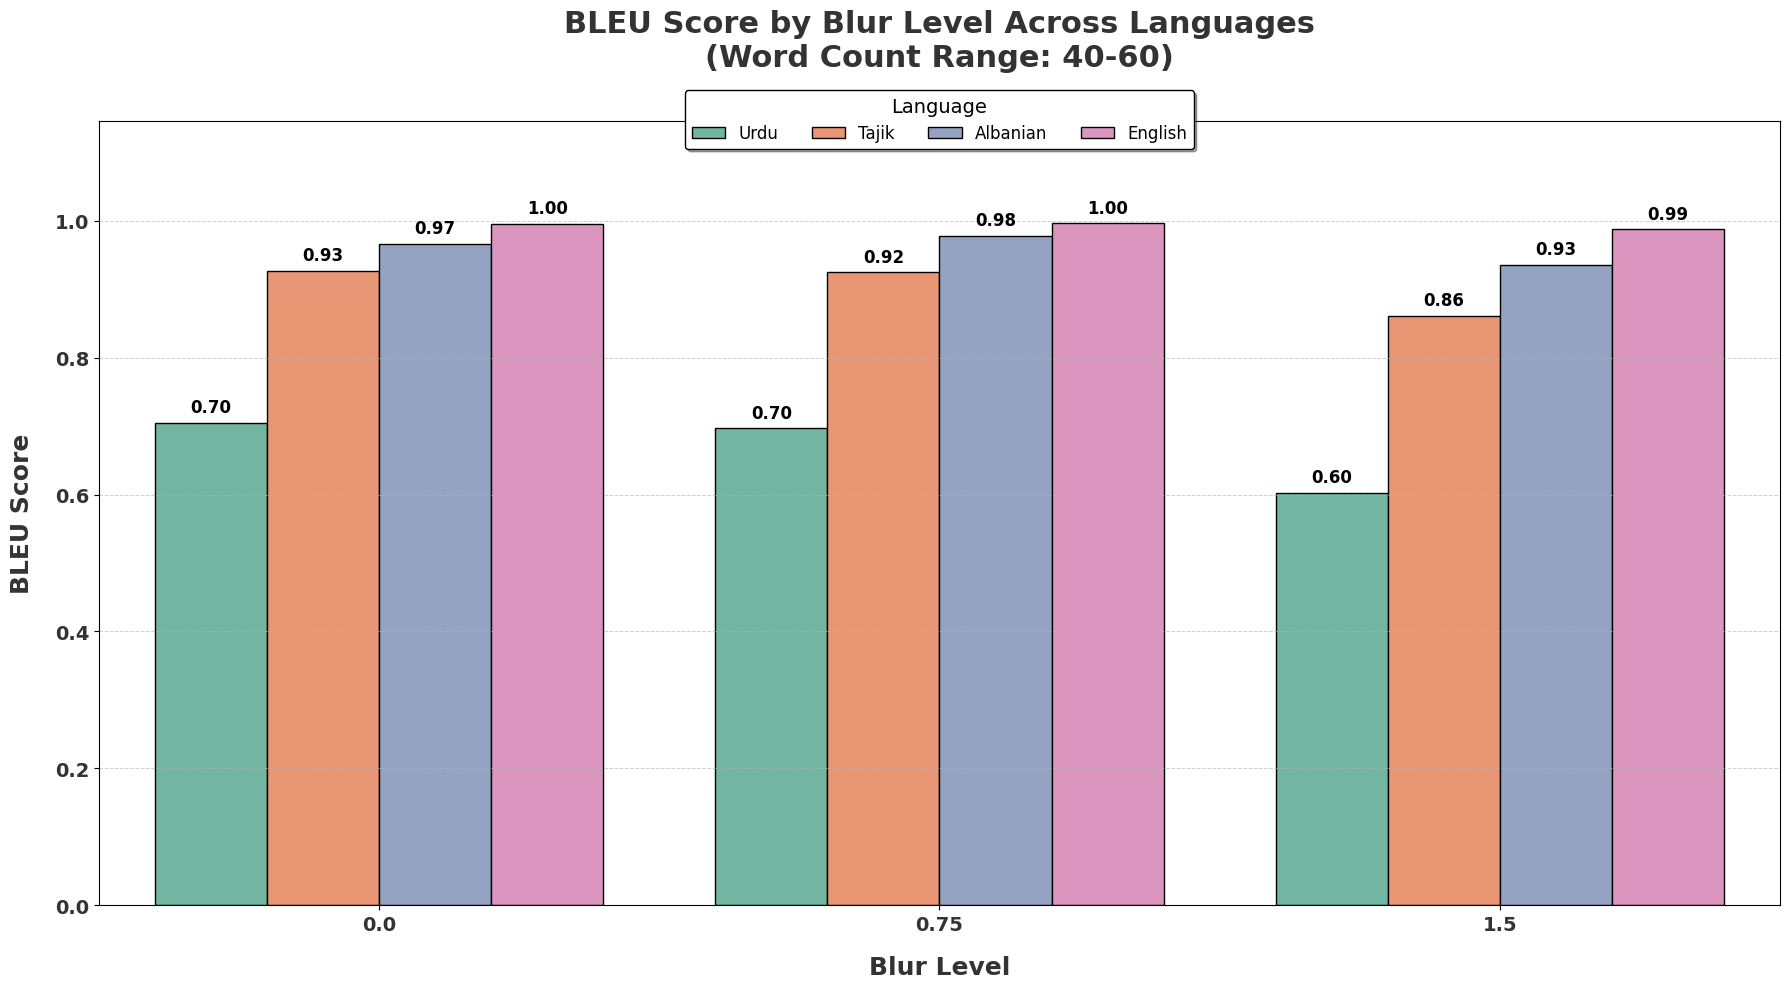

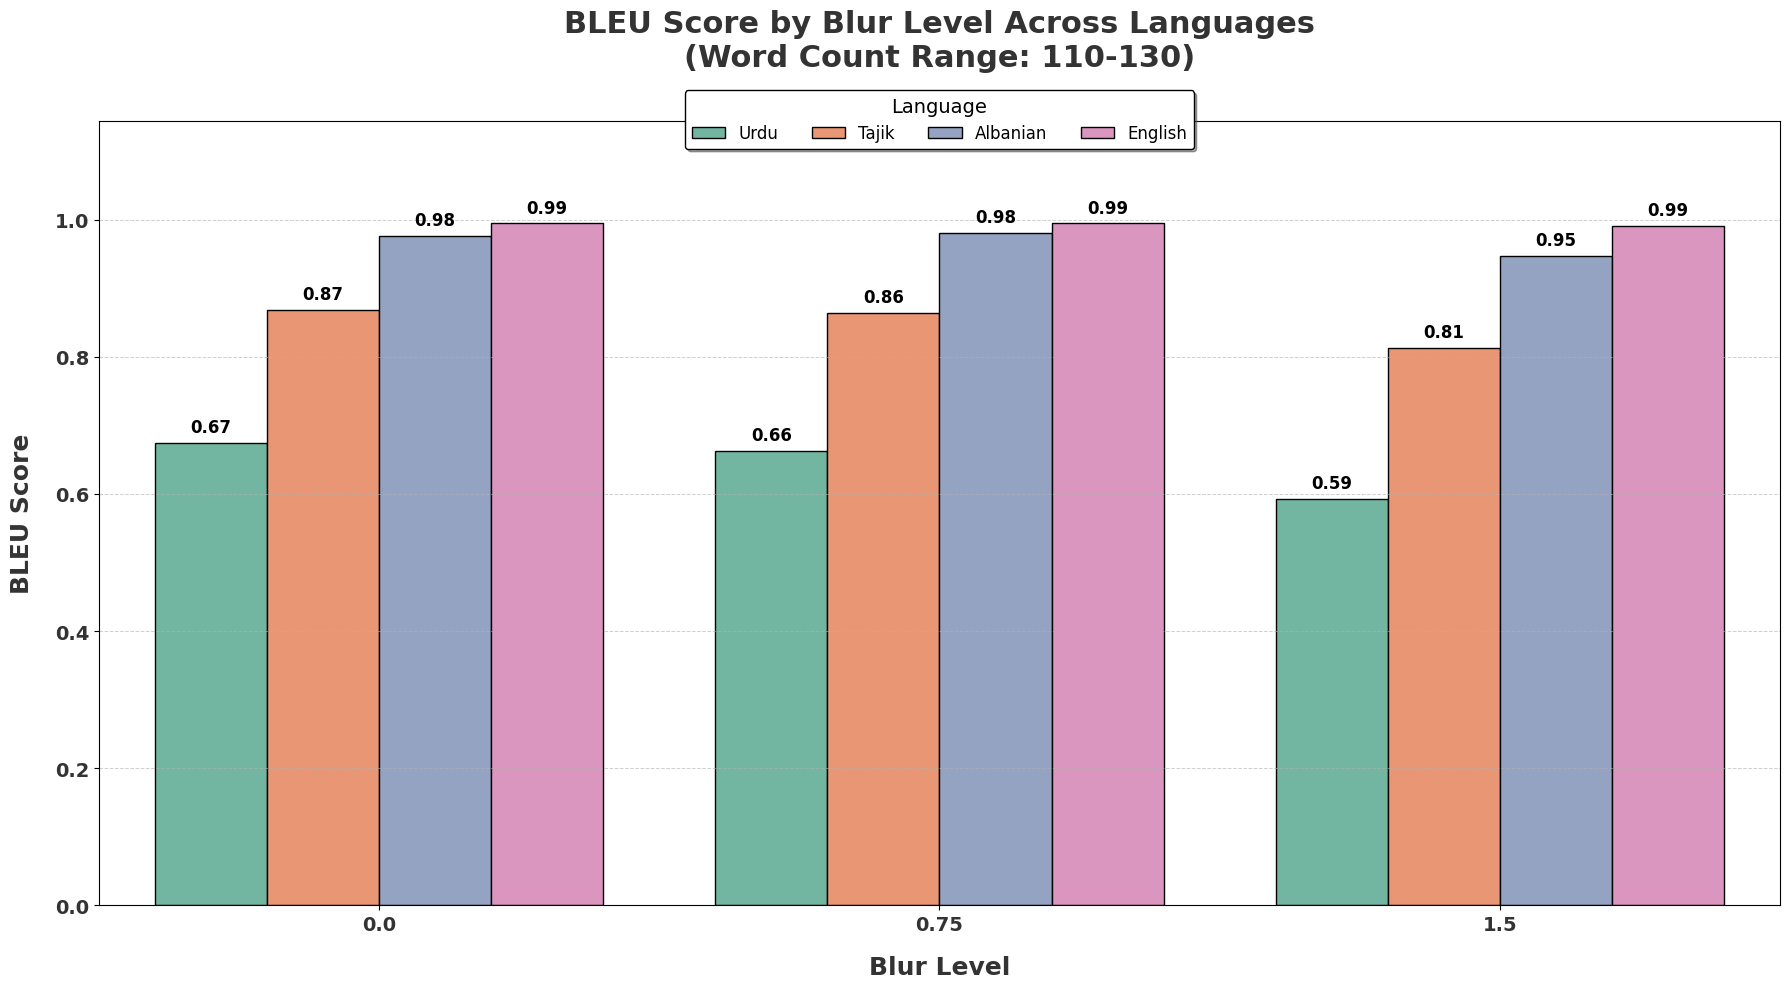

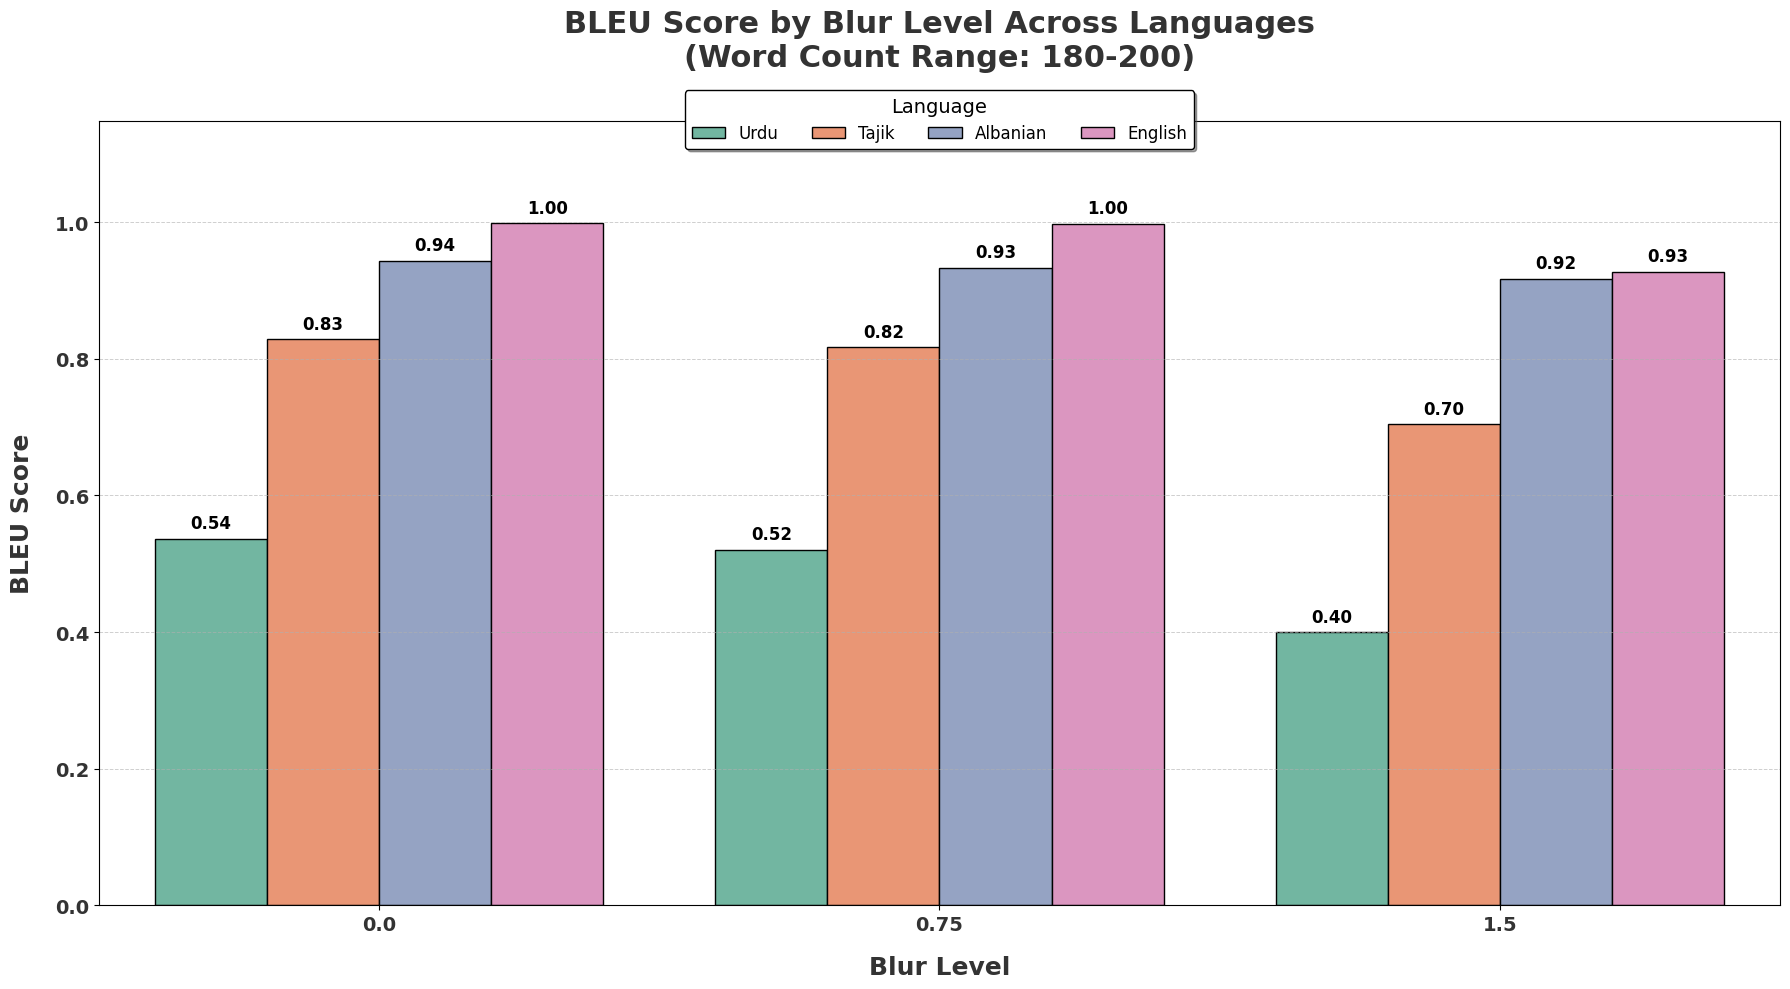

In [36]:
# Grouped Bar Plot for BLEU Score by Blur Level
def plot_grouped_bar_bleu_blur(df, word_count_order):
    for word_count in word_count_order:
        plt.figure(figsize=(18, 10))

        # Filter data for the specific word count range
        wc_combined_df = df[df['Word Count Range'] == word_count]
        
        # Create the bar plot
        sns.barplot(
            data=wc_combined_df,
            x='Blur Level',
            y='BLEU',
            hue='Language',
            ci=None,
            palette=sns.color_palette("Set2", len(wc_combined_df['Language'].unique())),
            edgecolor='black'
        )
        
        # Add annotations above each bar
        for bar in plt.gca().patches:
            bar_height = bar.get_height()
            bar_width = bar.get_width()
            bar_x = bar.get_x()
            if bar_height > 0 and bar_width > 0:
                plt.text(
                    bar_x + bar_width / 2,
                    bar_height + 0.01,
                    f'{bar_height:.2f}',
                    ha='center',
                    va='bottom',
                    fontsize=12,
                    fontweight='bold',
                    color='black'
                )
        
        # Customize the title and axis labels
        plt.title(
            f'BLEU Score by Blur Level Across Languages\n(Word Count Range: {word_count})',
            fontsize=22,
            fontweight='bold',
            pad=40,  # Increased padding to avoid overlap with legend
            color='#333333'
        )
        plt.xlabel('Blur Level', fontsize=18, labelpad=15, fontweight='bold', color='#333333')
        plt.ylabel('BLEU Score', fontsize=18, labelpad=15, fontweight='bold', color='#333333')
        
        # Customize the legend and move it below the title
        plt.legend(
            title='Language',
            title_fontsize=14,
            fontsize=12,
            loc='upper center',  # Position legend below the title
            bbox_to_anchor=(0.5, 1.05),  # Adjust position (centered above the plot)
            frameon=True,
            facecolor='white',
            edgecolor='black',
            fancybox=True,
            shadow=True,
            ncol=len(wc_combined_df['Language'].unique())  # Arrange legend items in a single row
        )
        
        # Add gridlines with a clean look
        plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.6)
        plt.xticks(fontsize=14, fontweight='bold', color='#333333')
        plt.yticks(fontsize=14, fontweight='bold', color='#333333')
        plt.ylim(0, wc_combined_df['BLEU'].max() * 1.15)
        plt.tight_layout()
        plt.show()

# Call the function for BLEU Score
plot_grouped_bar_bleu_blur(bleu_combined_df, word_count_order)


## BLEU Score HeatMaps

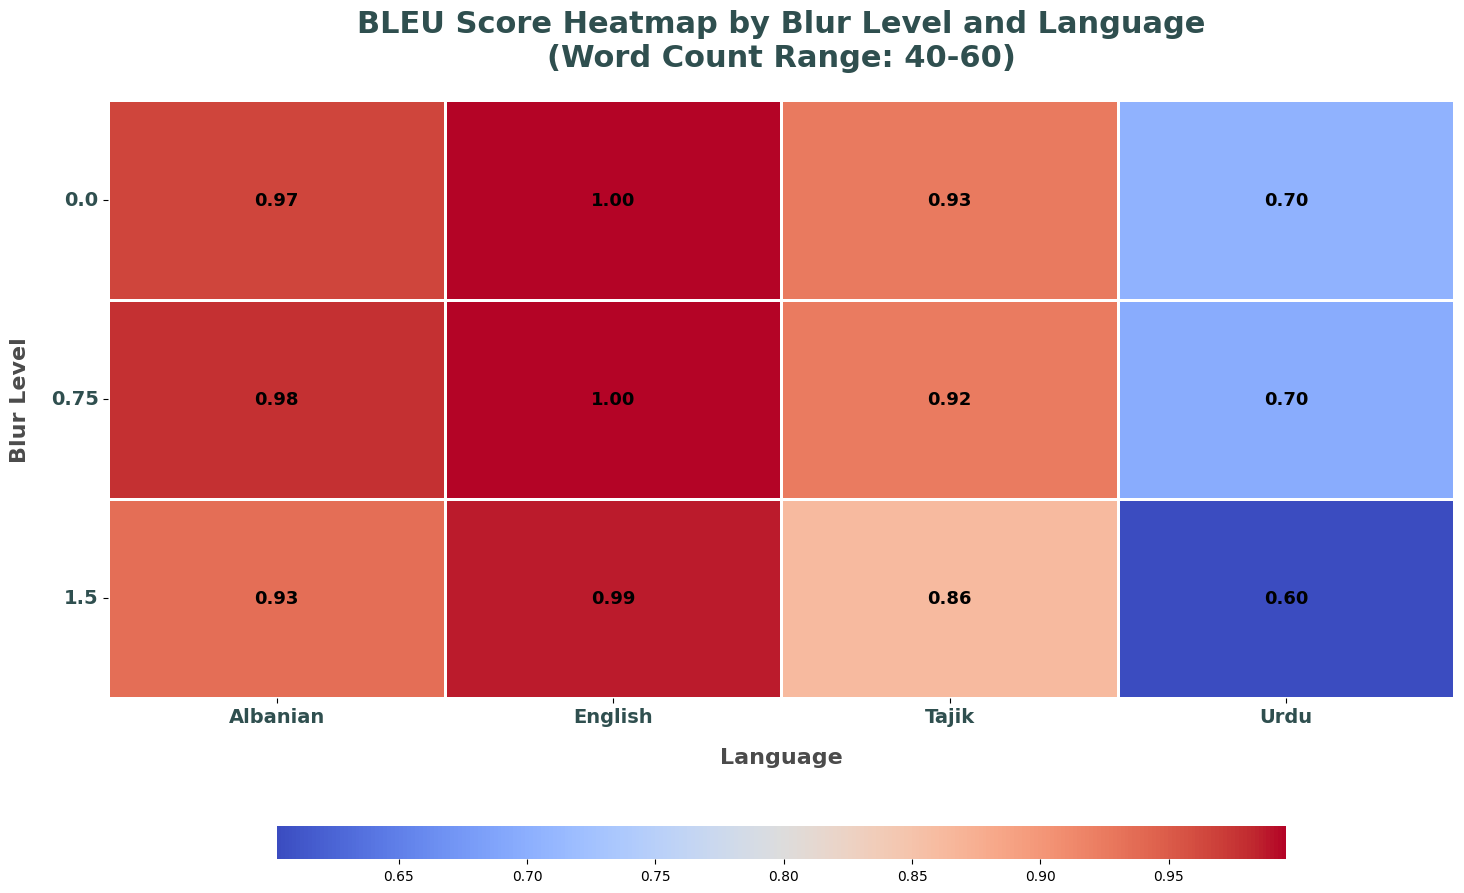

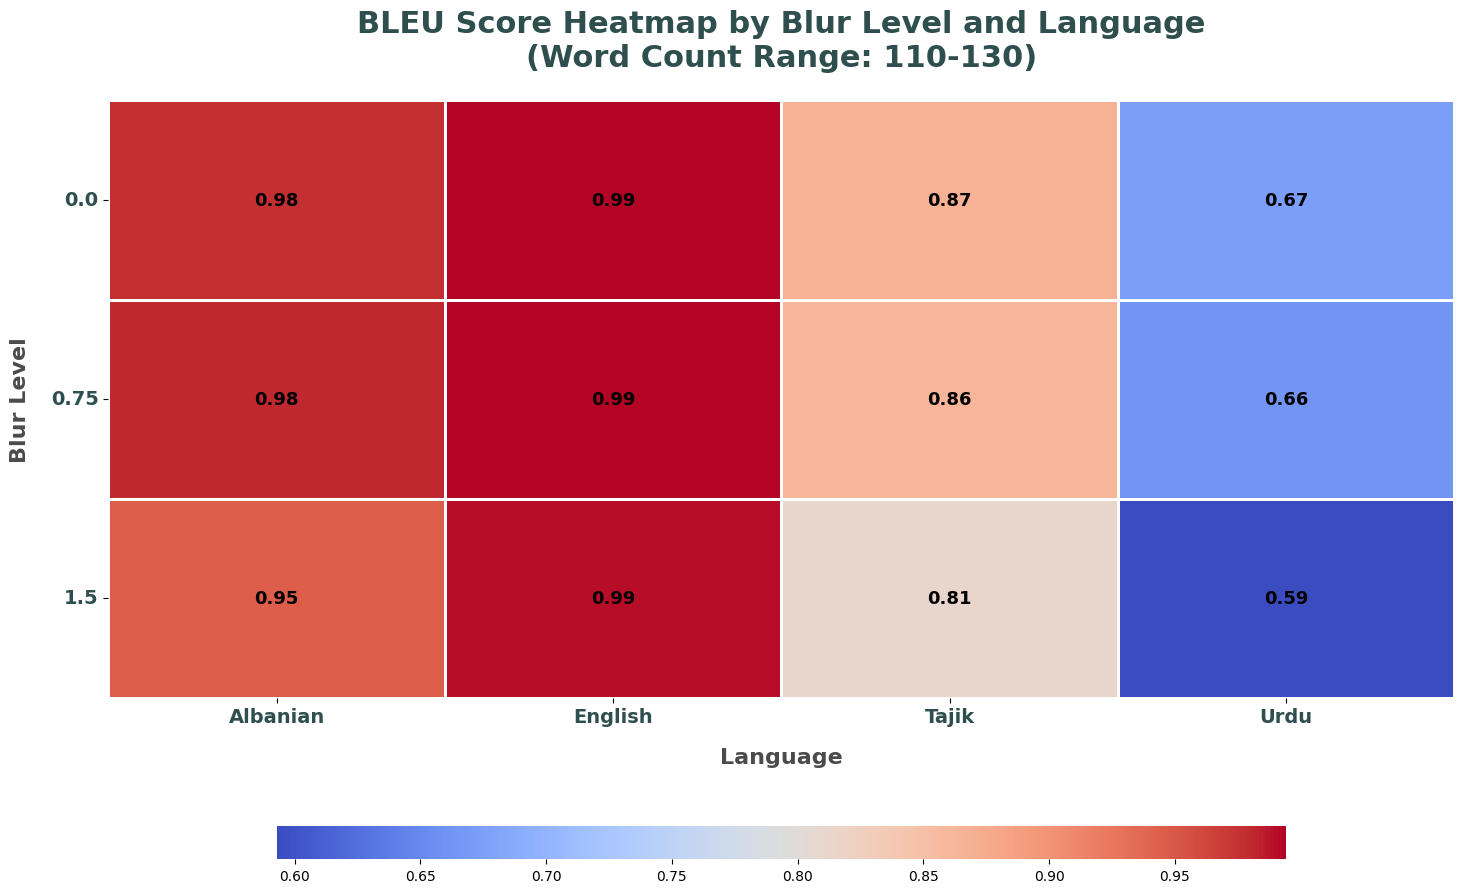

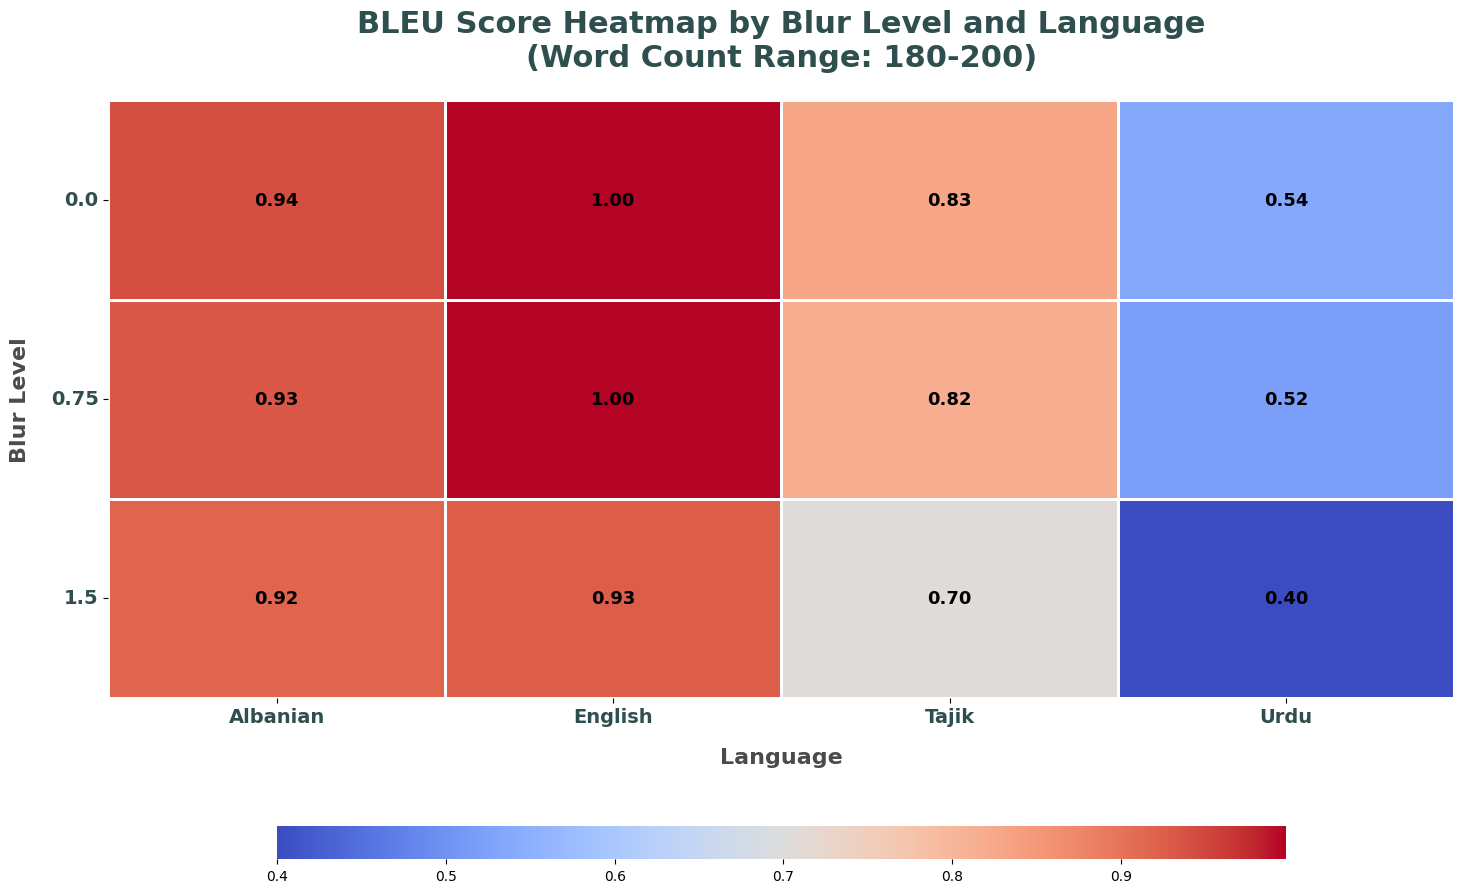

In [31]:
# Sleek Heatmaps for BLEU Scores by Blur Level
def plot_heatmaps_bleu_blur(df, word_count_order):
    for word_count in word_count_order:
        # Filter data for the current word count
        wc_bleu_combined_df = df[df['Word Count Range'] == word_count]

        # Create a pivot table for the heatmap
        heatmap_data_bleu = wc_bleu_combined_df.pivot_table(index='Blur Level', columns='Language', values='BLEU')

        # Create the figure and plot heatmap
        plt.figure(figsize=(15, 10))  # Larger size for emphasis
        sns.heatmap(
            heatmap_data_bleu,
            annot=True,
            fmt=".2f",
            cmap="coolwarm",  # Sleek, contrasting colormap
            annot_kws={"size": 13, "weight": "bold", "color": "black"},  # Styled annotations
            linewidths=2,  # Thicker cell dividers
            linecolor='white',  # White gridlines for a clean appearance
            cbar_kws={
                "orientation": "horizontal",  # Horizontal color bar for a modern look
                "shrink": 0.75,
                "aspect": 30,
                "pad": 0.15,  # Adjust spacing from the plot
                "ticks": None
            }
        )

        # Add a sleek title and labels
        plt.title(
            f'BLEU Score Heatmap by Blur Level and Language\n(Word Count Range: {word_count})',
            fontsize=22,
            fontweight='bold',
            pad=25,
            color='#2f4f4f'  # Dark grayish-green for a modern feel
        )
        plt.xlabel('Language', fontsize=16, fontweight='bold', labelpad=15, color='#4b4b4b')
        plt.ylabel('Blur Level', fontsize=16, fontweight='bold', labelpad=15, color='#4b4b4b')

        # Customize x and y ticks
        plt.xticks(fontsize=14, fontweight='bold', rotation=0, color='#2f4f4f')
        plt.yticks(fontsize=14, fontweight='bold', rotation=0, color='#2f4f4f')

        # Adjust layout for visual balance
        plt.tight_layout(pad=2.0)
        plt.show()

# Call the function for BLEU heatmaps
plot_heatmaps_bleu_blur(bleu_combined_df, word_count_order)


## F1 Score

In [32]:
# Function to calculate F1 scores for blur level analysis
def calculate_f1_scores(df):
    precision_scores = []
    recall_scores = []
    f1_scores = []

    for _, row in df.iterrows():
        reference = str(row['Gold Label']).split()
        hypothesis = str(row['Response']).split()

        # Calculate matches and mismatches
        true_positives = len(set(reference) & set(hypothesis))
        false_positives = len(set(hypothesis) - set(reference))
        false_negatives = len(set(reference) - set(hypothesis))

        # Avoid division by zero
        precision = true_positives / (true_positives + false_positives) if (true_positives + false_positives) > 0 else 0
        recall = true_positives / (true_positives + false_negatives) if (true_positives + false_negatives) > 0 else 0
        f1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0

        precision_scores.append(precision)
        recall_scores.append(recall)
        f1_scores.append(f1)

    # Add scores to DataFrame
    df['Precision'] = precision_scores
    df['Recall'] = recall_scores
    df['F1-Score'] = f1_scores
    return df

# Calculate F1 scores for each dataset
urdu_f1_df = calculate_f1_scores(filtered_urdu_df)
english_f1_df = calculate_f1_scores(filtered_english_df)
tajik_f1_df = calculate_f1_scores(filtered_tajik_df)
albanian_f1_df = calculate_f1_scores(filtered_albanian_df)

# Combine F1-score results for grouped analysis
f1_combined_results = []

def append_f1_results_blur(df, word_count_order, language_name):
    for word_count in word_count_order:
        wc_df = df[df['Word Count Range'] == word_count]
        avg_f1 = wc_df.groupby('Blur Level')['F1-Score'].mean().reset_index()
        avg_f1['Language'] = language_name
        avg_f1['Word Count Range'] = word_count
        f1_combined_results.append(avg_f1)

# Append F1 results for all languages
append_f1_results_blur(urdu_f1_df, word_count_order, "Urdu")
append_f1_results_blur(tajik_f1_df, word_count_order, "Tajik")
append_f1_results_blur(albanian_f1_df, word_count_order, "Albanian")
append_f1_results_blur(english_f1_df, word_count_order, "English")


# Combine F1-score results into a single DataFrame
f1_combined_df = pd.concat(f1_combined_results, ignore_index=True)
print("Combined F1-score results DataFrame created.")


Combined F1-score results DataFrame created.


## F1 Score Grouped Bar Plots

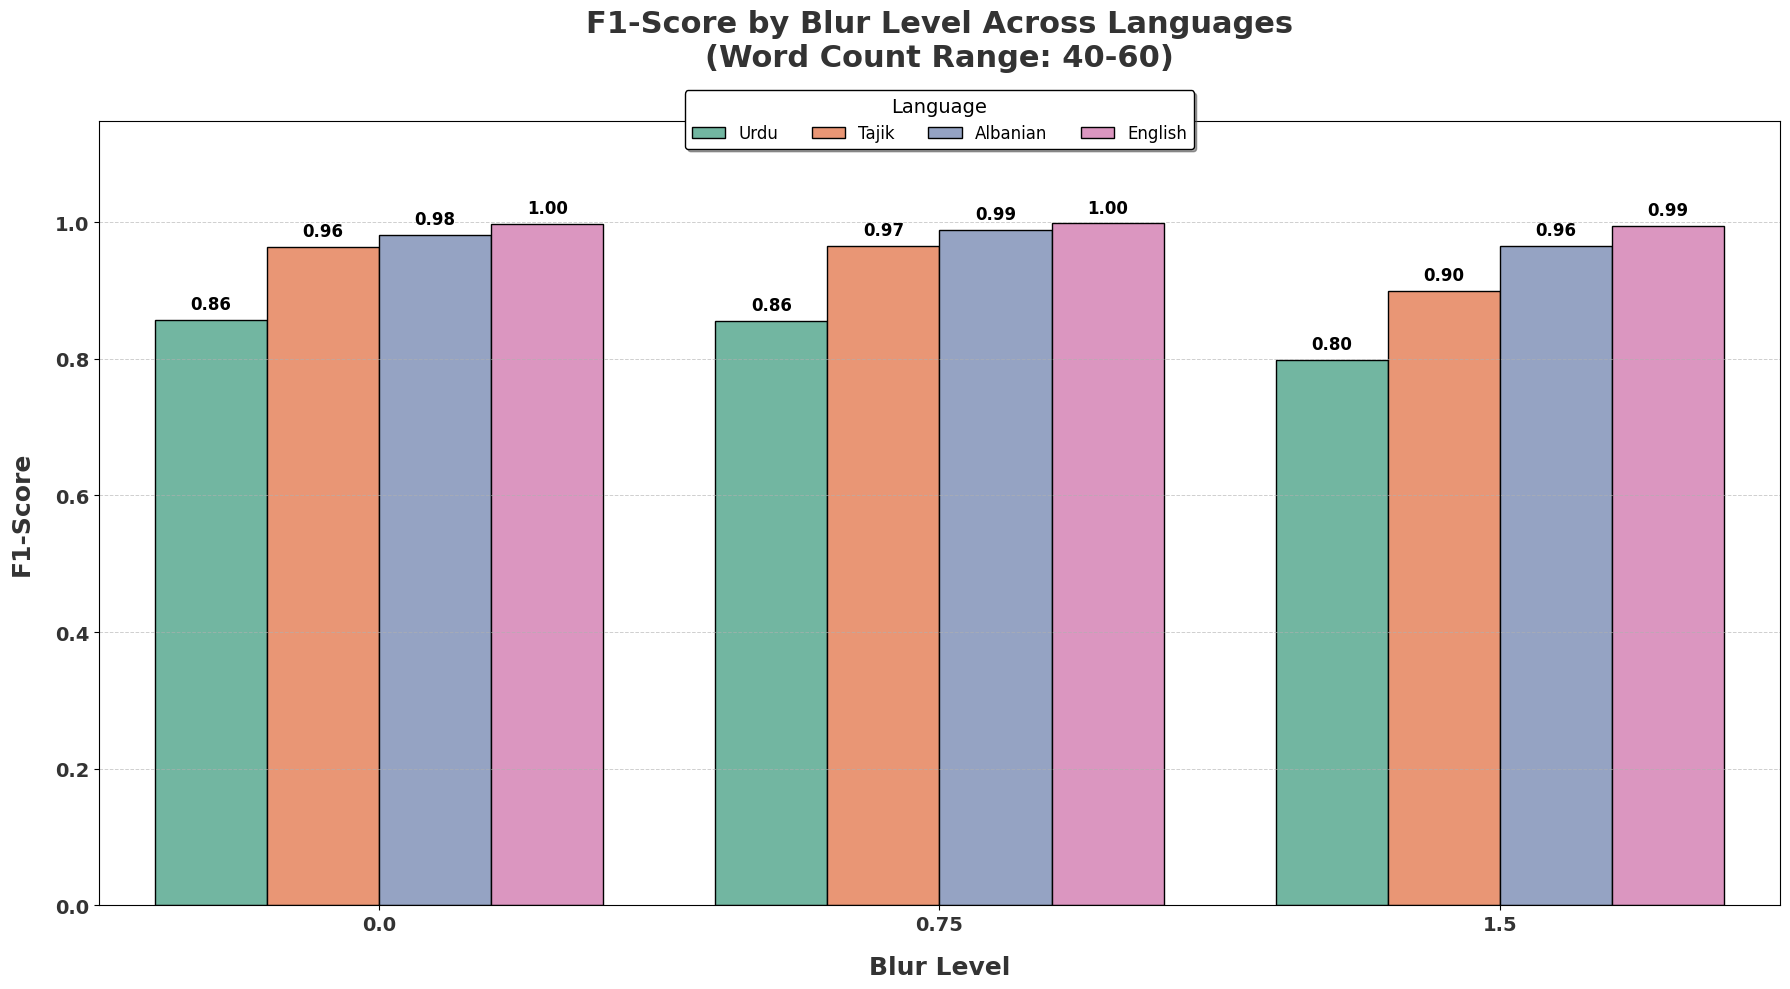

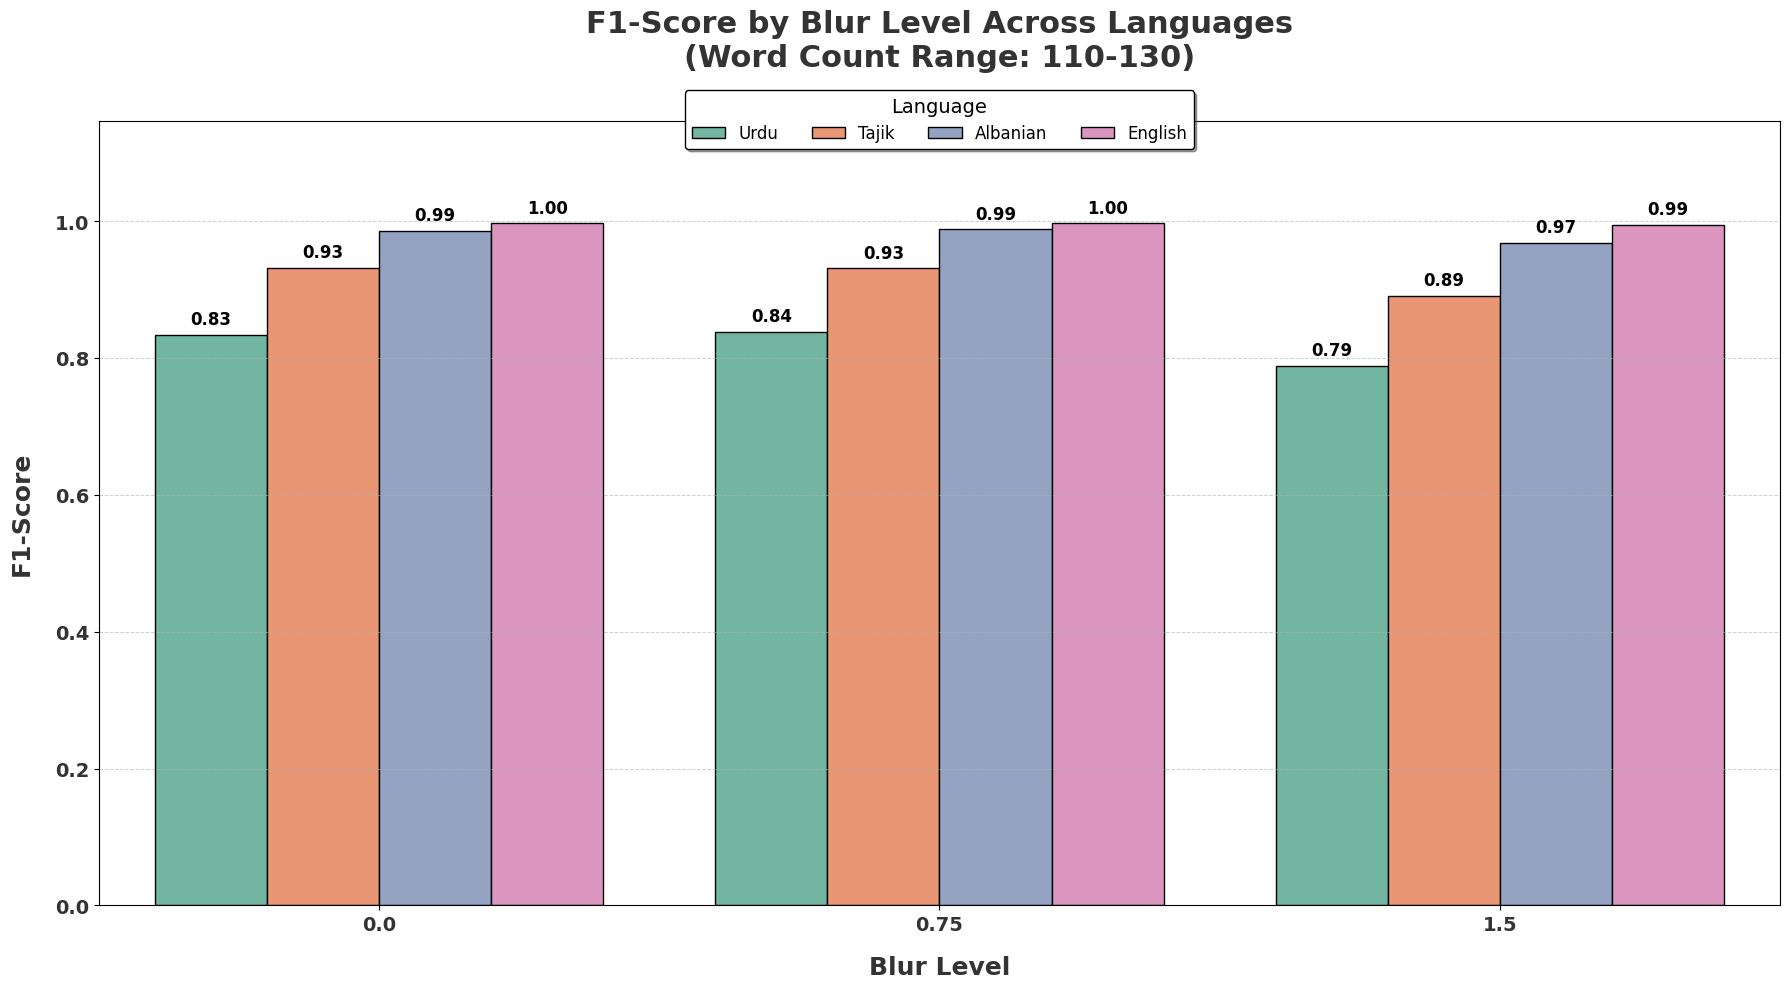

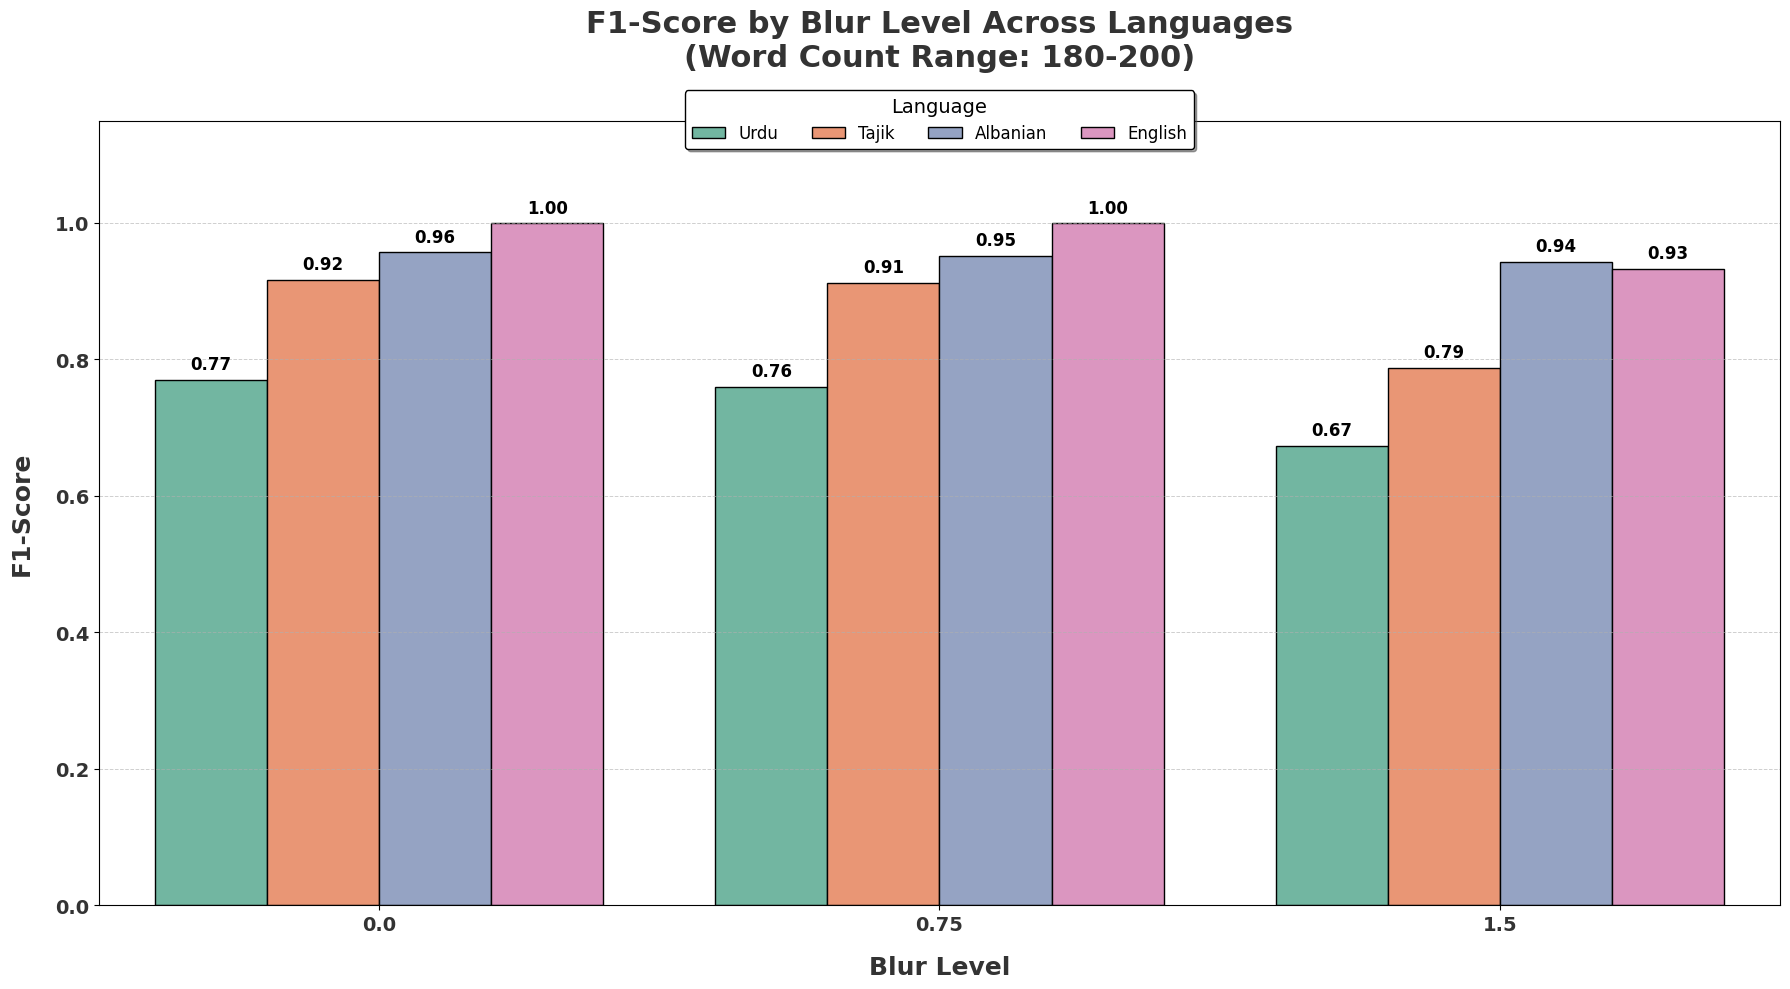

In [37]:
# Grouped Bar Plot for F1-Score by Blur Level
def plot_grouped_bar_f1_blur(df, word_count_order):
    for word_count in word_count_order:
        plt.figure(figsize=(18, 10))

        # Filter data for the specific word count range
        wc_combined_df = df[df['Word Count Range'] == word_count]
        
        # Create the bar plot
        sns.barplot(
            data=wc_combined_df,
            x='Blur Level',
            y='F1-Score',
            hue='Language',
            ci=None,
            palette=sns.color_palette("Set2", len(wc_combined_df['Language'].unique())),
            edgecolor='black'
        )
        
        # Add annotations above each bar
        for bar in plt.gca().patches:
            bar_height = bar.get_height()
            bar_width = bar.get_width()
            bar_x = bar.get_x()
            if bar_height > 0 and bar_width > 0:
                plt.text(
                    bar_x + bar_width / 2,
                    bar_height + 0.01,
                    f'{bar_height:.2f}',
                    ha='center',
                    va='bottom',
                    fontsize=12,
                    fontweight='bold',
                    color='black'
                )
        
        # Customize the title and axis labels
        plt.title(
            f'F1-Score by Blur Level Across Languages\n(Word Count Range: {word_count})',
            fontsize=22,
            fontweight='bold',
            pad=40,  # Increased padding to avoid overlap with legend
            color='#333333'
        )
        plt.xlabel('Blur Level', fontsize=18, labelpad=15, fontweight='bold', color='#333333')
        plt.ylabel('F1-Score', fontsize=18, labelpad=15, fontweight='bold', color='#333333')
        
        # Customize the legend and move it below the title
        plt.legend(
            title='Language',
            title_fontsize=14,
            fontsize=12,
            loc='upper center',  # Position legend below the title
            bbox_to_anchor=(0.5, 1.05),  # Adjust position (centered above the plot)
            frameon=True,
            facecolor='white',
            edgecolor='black',
            fancybox=True,
            shadow=True,
            ncol=len(wc_combined_df['Language'].unique())  # Arrange legend items in a single row
        )
        
        # Add gridlines with a clean look
        plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.6)
        plt.xticks(fontsize=14, fontweight='bold', color='#333333')
        plt.yticks(fontsize=14, fontweight='bold', color='#333333')
        plt.ylim(0, wc_combined_df['F1-Score'].max() * 1.15)
        plt.tight_layout()
        plt.show()

# Call the function for F1-Score
plot_grouped_bar_f1_blur(f1_combined_df, word_count_order)


## F1 Score HeatMaps

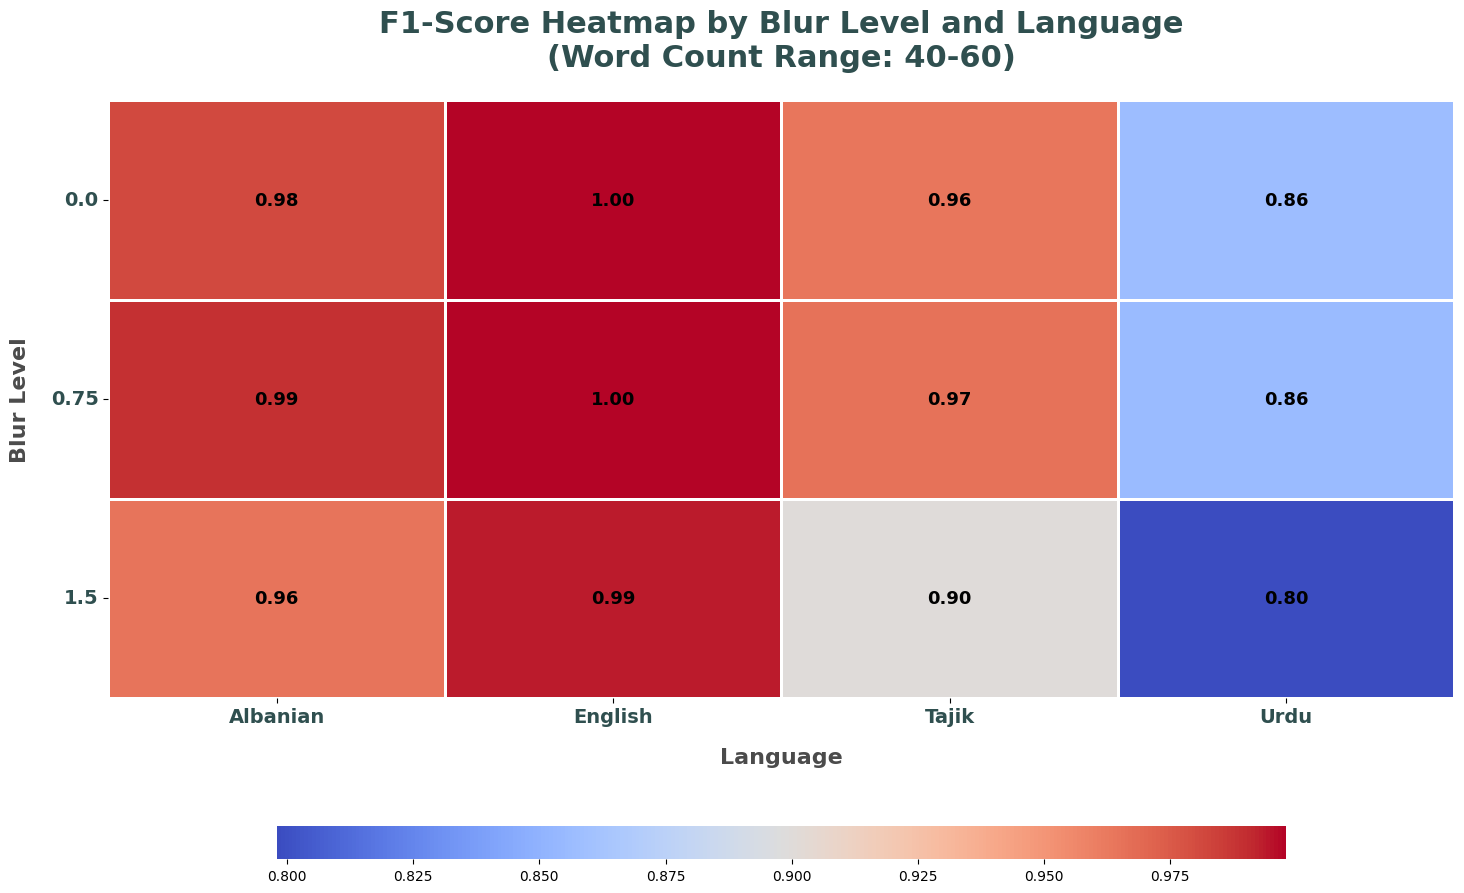

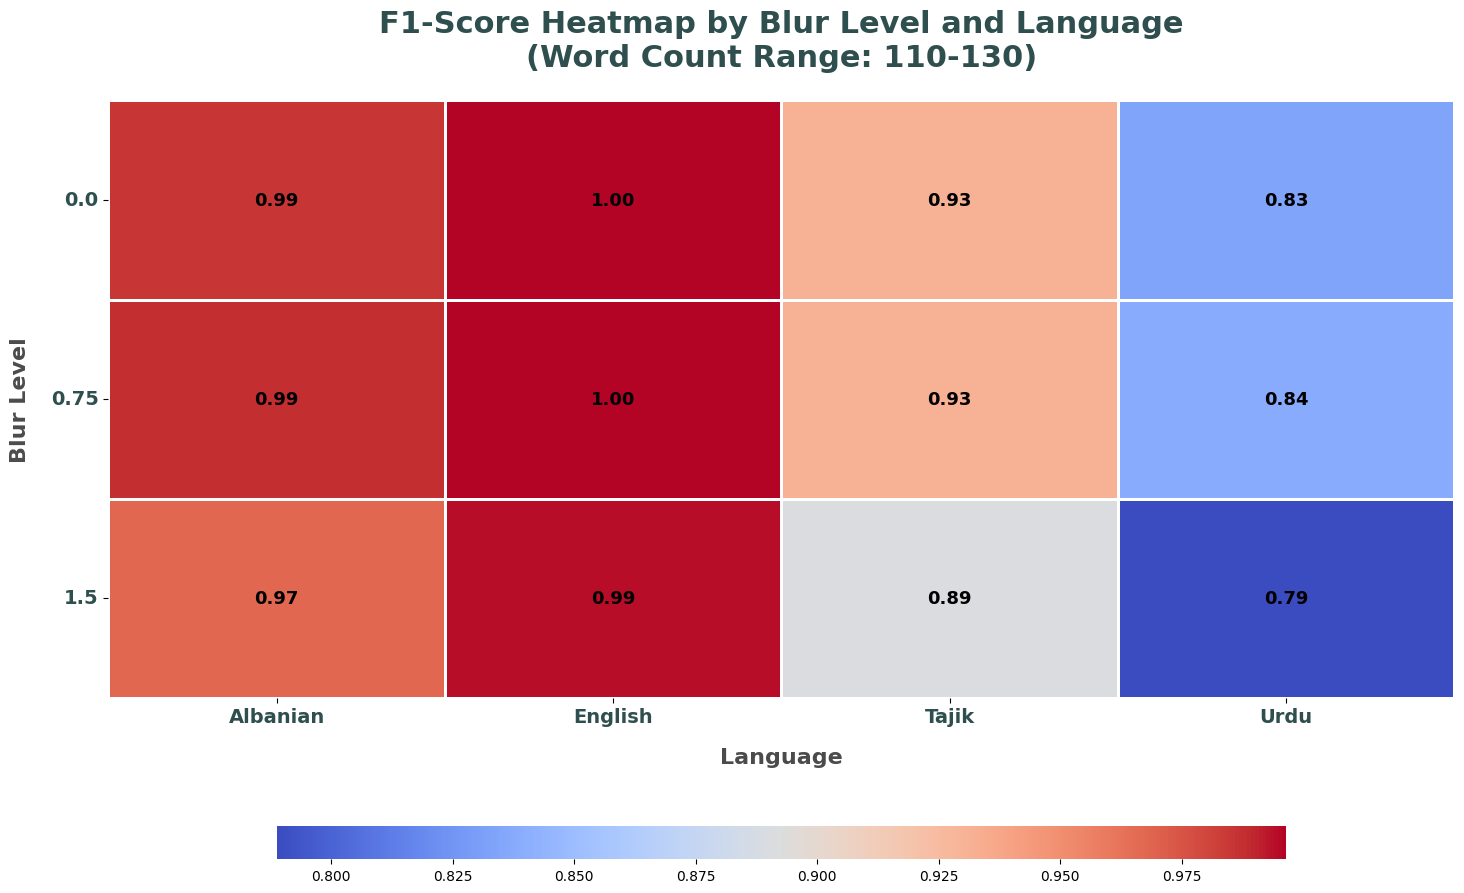

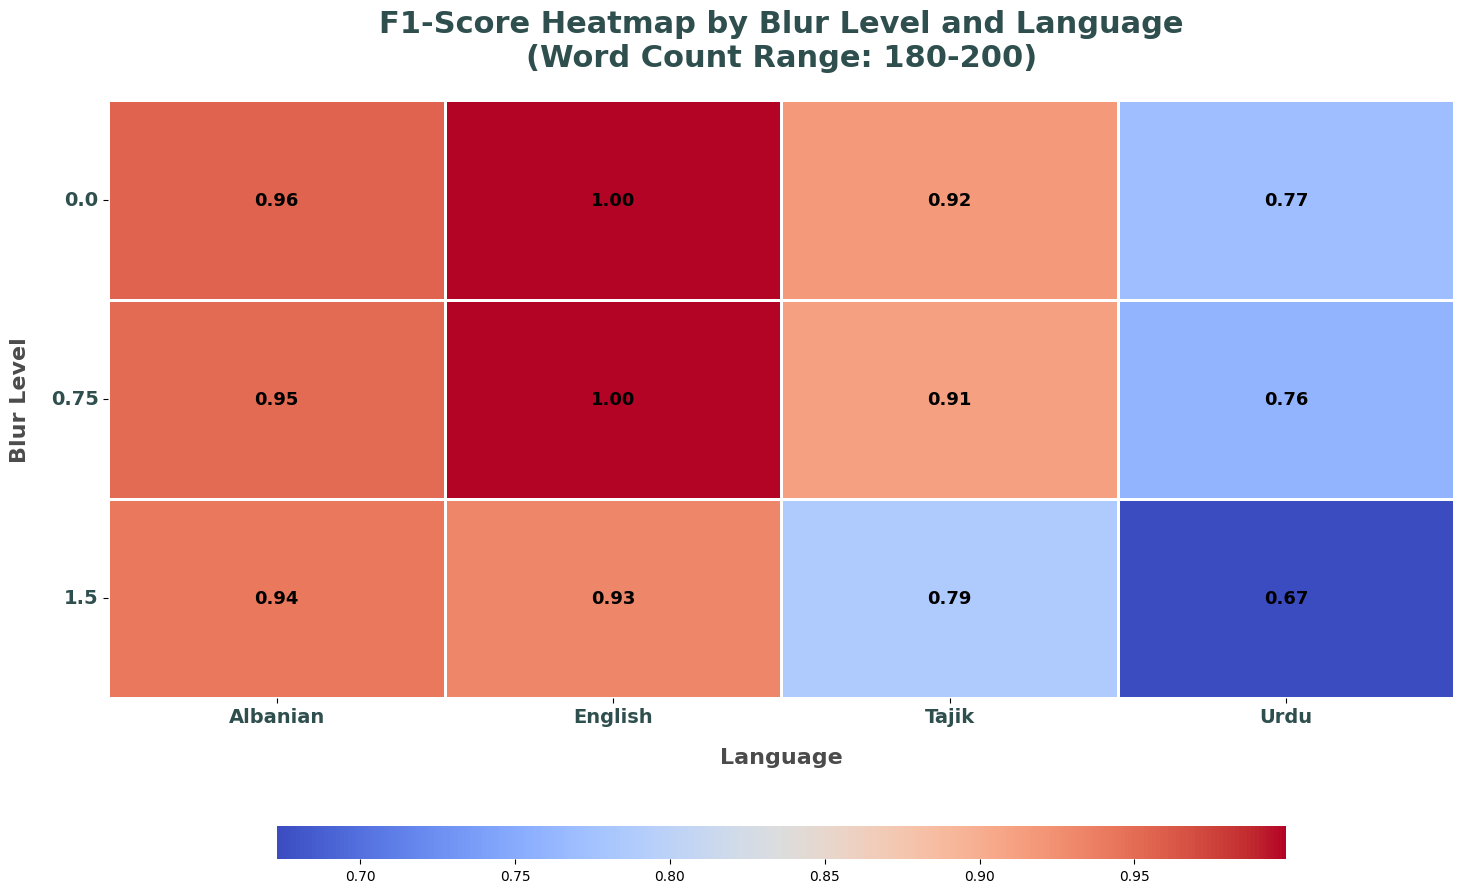

In [34]:
# Sleek Heatmaps for F1-Scores by Blur Level
def plot_heatmaps_f1_blur(df, word_count_order):
    for word_count in word_count_order:
        # Filter data for the current word count
        wc_f1_combined_df = df[df['Word Count Range'] == word_count]

        # Create a pivot table for the heatmap
        heatmap_data_f1 = wc_f1_combined_df.pivot_table(index='Blur Level', columns='Language', values='F1-Score')

        # Create the figure and plot heatmap
        plt.figure(figsize=(15, 10))  # Larger size for emphasis
        sns.heatmap(
            heatmap_data_f1,
            annot=True,
            fmt=".2f",
            cmap="coolwarm",  # Sleek, contrasting colormap
            annot_kws={"size": 13, "weight": "bold", "color": "black"},  # Styled annotations
            linewidths=2,  # Thicker cell dividers
            linecolor='white',  # White gridlines for a clean appearance
            cbar_kws={
                "orientation": "horizontal",  # Horizontal color bar for a modern look
                "shrink": 0.75,
                "aspect": 30,
                "pad": 0.15,  # Adjust spacing from the plot
                "ticks": None
            }
        )

        # Add a sleek title and labels
        plt.title(
            f'F1-Score Heatmap by Blur Level and Language\n(Word Count Range: {word_count})',
            fontsize=22,
            fontweight='bold',
            pad=25,
            color='#2f4f4f'  # Dark grayish-green for a modern feel
        )
        plt.xlabel('Language', fontsize=16, fontweight='bold', labelpad=15, color='#4b4b4b')
        plt.ylabel('Blur Level', fontsize=16, fontweight='bold', labelpad=15, color='#4b4b4b')

        # Customize x and y ticks
        plt.xticks(fontsize=14, fontweight='bold', rotation=0, color='#2f4f4f')
        plt.yticks(fontsize=14, fontweight='bold', rotation=0, color='#2f4f4f')

        # Adjust layout for visual balance
        plt.tight_layout(pad=2.0)
        plt.show()

# Call the function for F1-Score heatmaps
plot_heatmaps_f1_blur(f1_combined_df, word_count_order)
